# Evaluation Project 

Project Description:
    
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# By: Udit Lakhoria

In [1]:
#Importing important libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


Importing dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
df.shape

(7043, 21)

Dataset contains 7043 rows and 21 columns

let's look into the coulmns for better insight


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

# Observations:
    
This telecom data collection has 21 columns and 7043 rows.

We have a categorization issue since our target variable, "Churn," has an object datatype.

'TotalCharges', an intriguing item under object datatype, is present here. Although it has a numerical character, this attribute is classified as an Object datatype. This suggests that a string variable may be present in this column or that there may be a data mistake.

The category variable "SeniorCitizen" is provided as a numerical variable. Therefore, we changed it to an object datatype.

We have 3 numerical variables and 18 category variables in the conclusion. Out of which "CustomerID" is a variable that is superfluous from an analytical and modelling perspective. The 'CustomerID' column will be removed.

Splitting the dataset in numerical and categorical 

In [6]:
Cat= [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen', 'Churn']
Num= ['tenure','MonthlyCharges','TotalCharges']

# Let's check the missing values in the data

In [7]:
df.isin([' ','NA','-']).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Observations

only Total charges column have the missing values and it needs to be treated 

In [8]:
df['TotalCharges'].isin([' ']).sum().any()

True

In [9]:
df['TotalCharges']= df['TotalCharges'].replace(' ',np.nan)

In [10]:
df['TotalCharges']= df['TotalCharges'].astype(float)

In [11]:
miss_val = df.isnull().sum().sort_values(ascending = False)
print(pd.concat([miss_val], axis =1, keys =['Missing Values']))

                  Missing Values
TotalCharges                  11
customerID                     0
DeviceProtection               0
MonthlyCharges                 0
PaymentMethod                  0
PaperlessBilling               0
Contract                       0
StreamingMovies                0
StreamingTV                    0
TechSupport                    0
OnlineBackup                   0
gender                         0
OnlineSecurity                 0
InternetService                0
MultipleLines                  0
PhoneService                   0
tenure                         0
Dependents                     0
Partner                        0
SeniorCitizen                  0
Churn                          0


# Way forward:
    
In TotalCharges, we may substitute missing values using either the mean or the median. After examining the distribution and outliers in the data, we may choose an imputation approach.

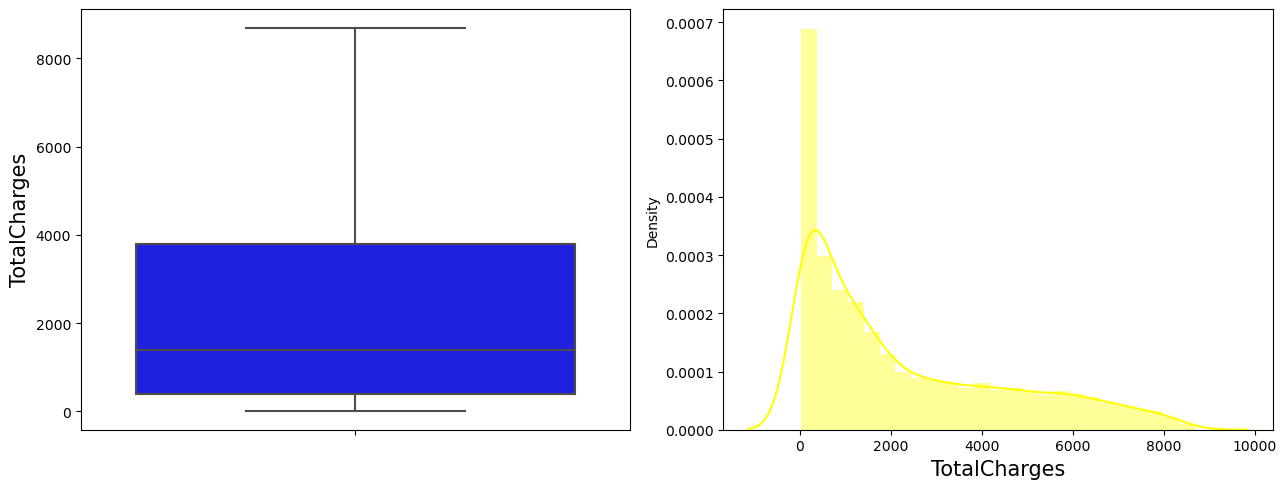

In [13]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges', data=df,color='blue')
plt.ylabel('TotalCharges',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'], color='Yellow')
plt.xlabel('TotalCharges',fontsize=15)
plt.tight_layout()
plt.show()

In [14]:
print("Mean:",df['TotalCharges'].mean())
print("Median:",df['TotalCharges'].median())

Mean: 2283.3004408418697
Median: 1397.475


Observation:
    
Since there are no outliers in this data, there is no mean sensitivity issue.
The distribution figure demonstrates the proper skewness of the Total Charges feature.

Median is less than Mean.

Imputation of Missing Value Using Mean in TotalCharges

In [16]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

Checking null values again

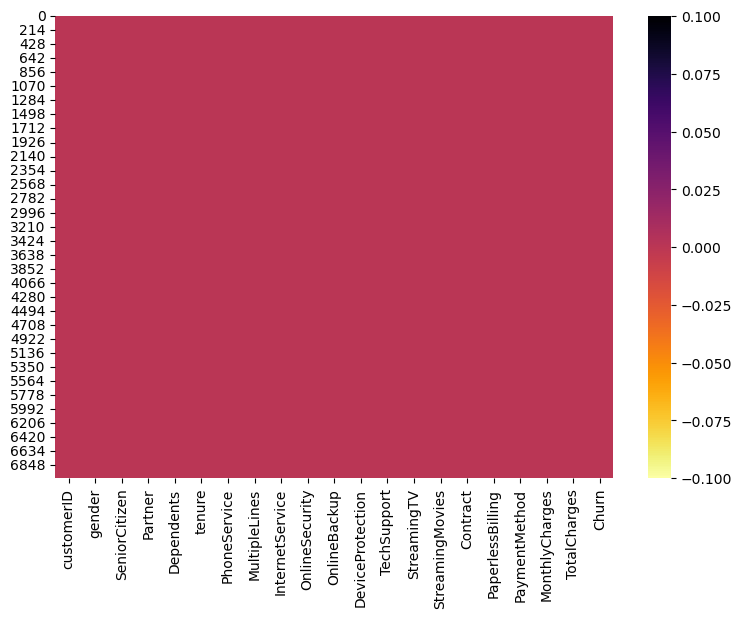

In [18]:
plt.figure(figsize=(9,6))
sns.heatmap(df.isnull(),cmap="inferno_r")
plt.show()

Now we have no missing value present in the dataset. Lets move ahead

Lets check if there is any duplicate data present in the dataset

In [19]:
df.duplicated().sum() 

0

No duplicate data present in the dataset

Lets remove the unnecessary Columns

In [20]:
df.drop(['customerID'],axis=1,inplace=True)

In [21]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [28]:
Categorical = [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen', 'Churn']
Numerical = ['tenure','MonthlyCharges','TotalCharges']

In [31]:
Categorical

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen',
 'Churn']

Start by listing Value counts and possible Sub-categories for various categorial attributes.

In [32]:
for i in Categorical:
    print(i)
    print(df[i].value_counts())
    print("*"*50)

gender
Male      3555
Female    3488
Name: gender, dtype: int64
**************************************************
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
**************************************************
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
**************************************************
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
**************************************************
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
**************************************************
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
**************************************************
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
**************************************************
OnlineBackup
N

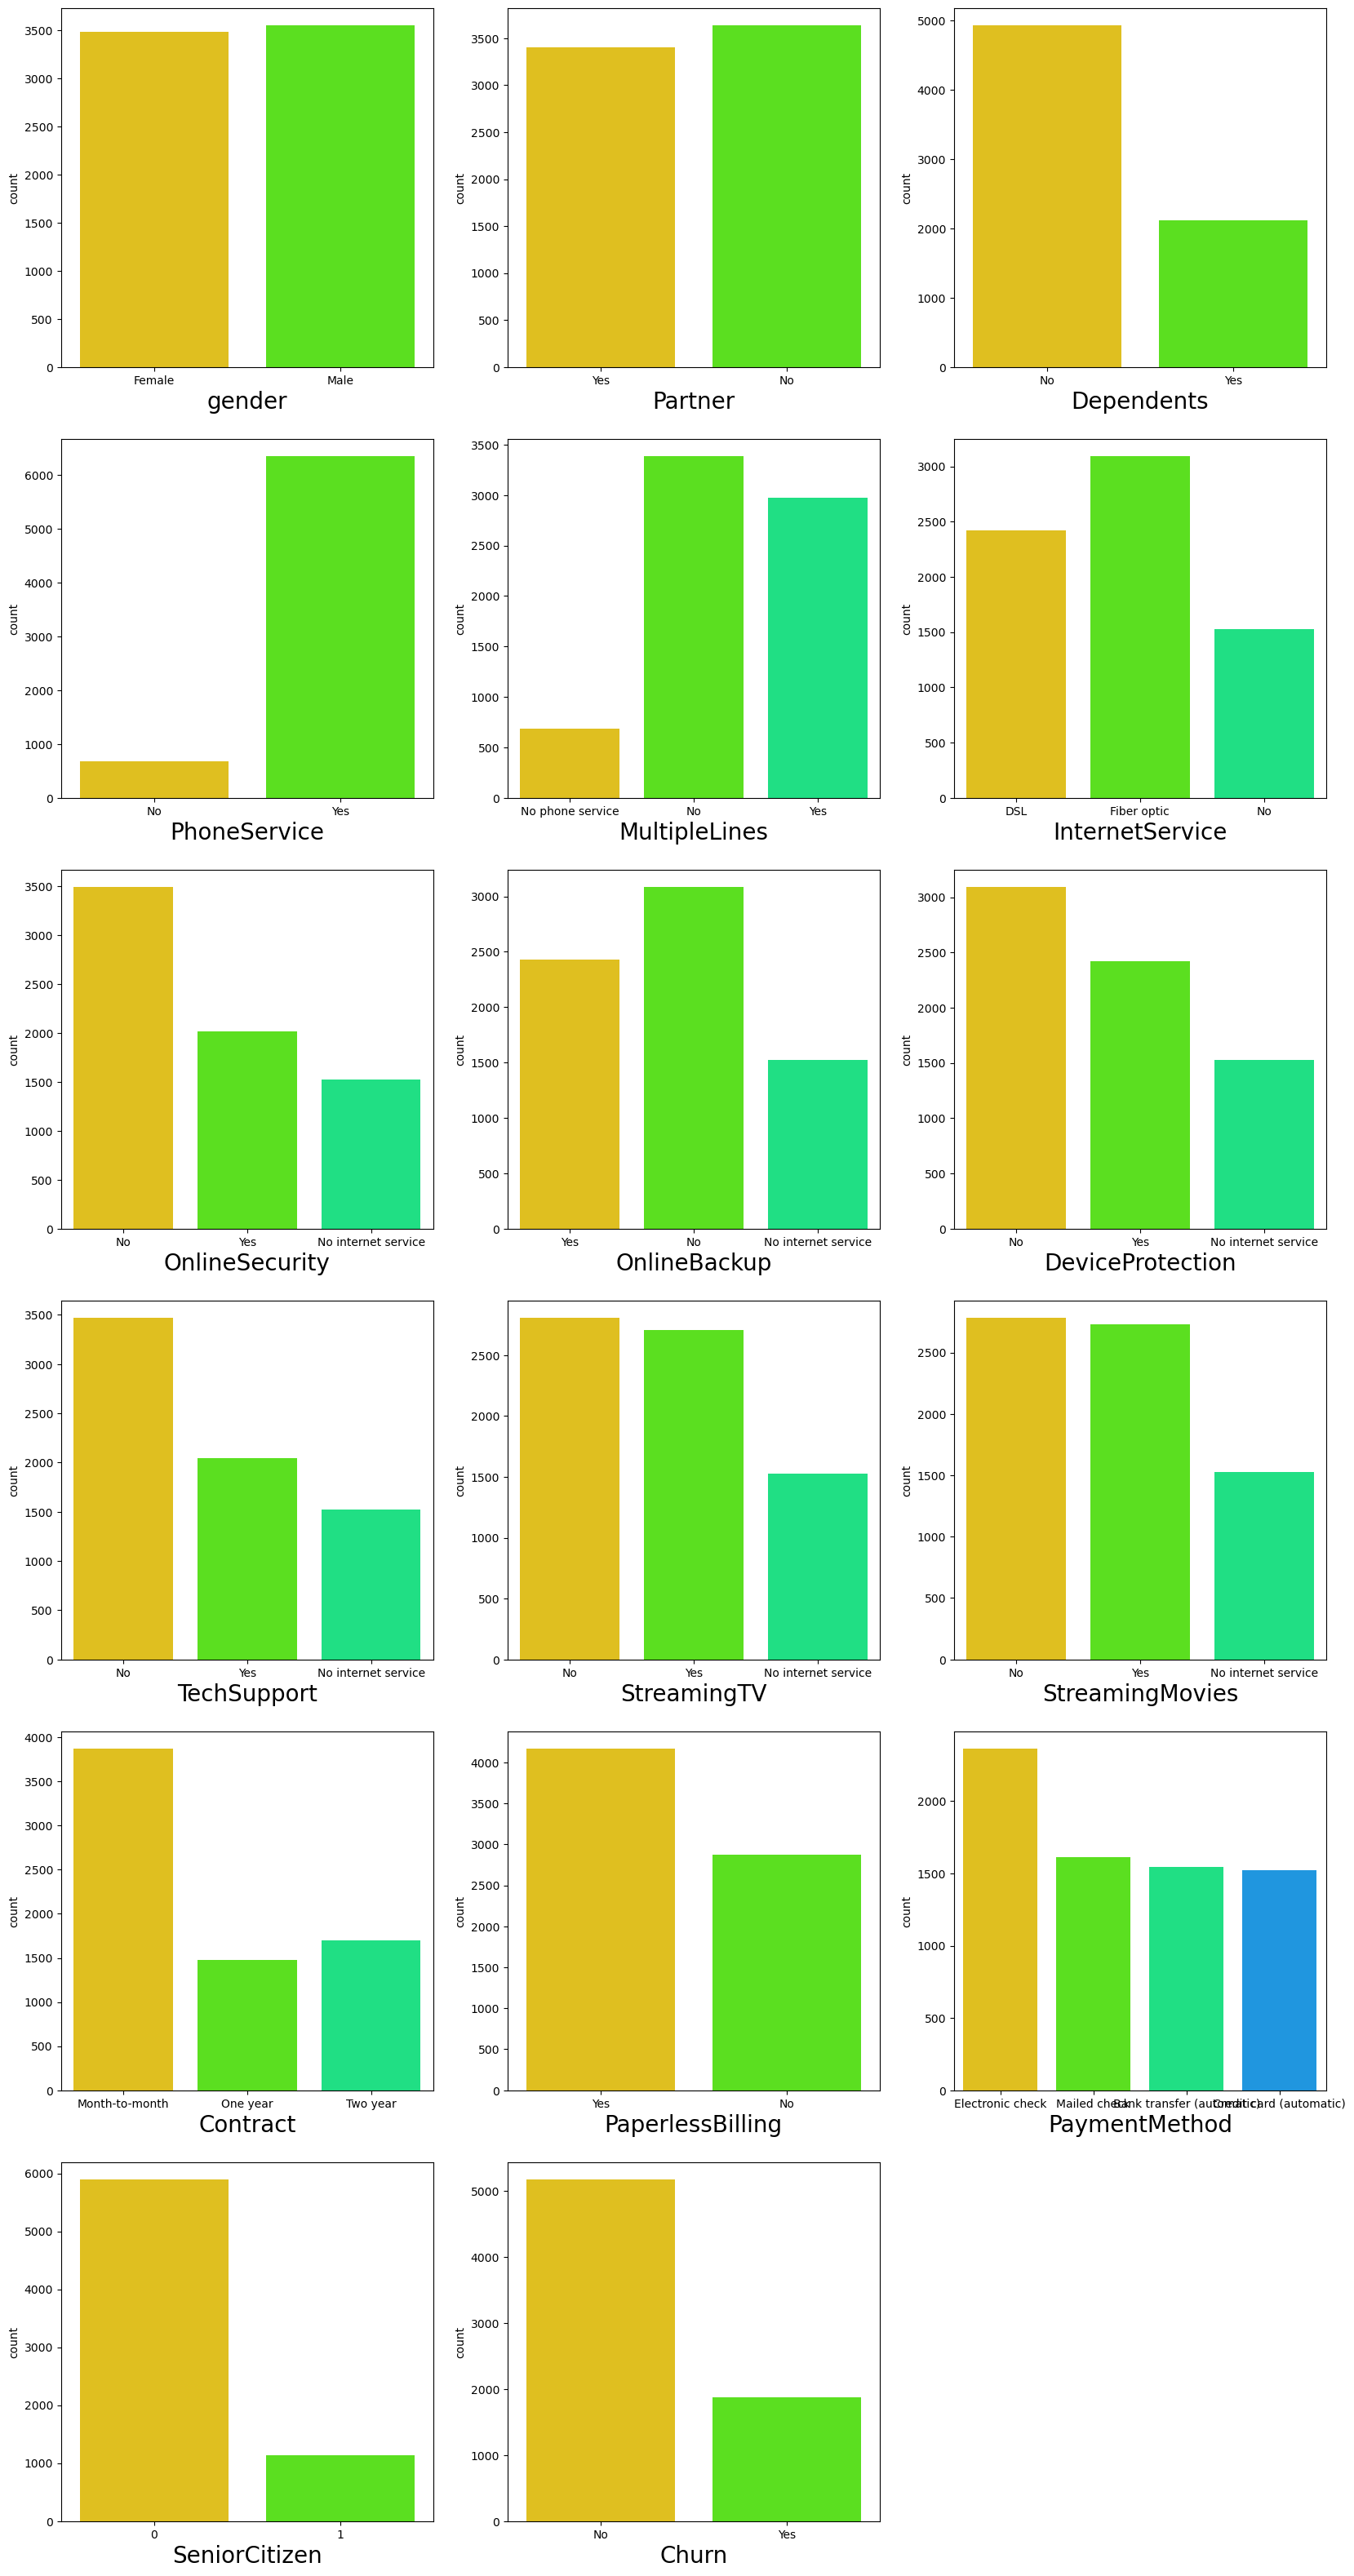

In [33]:
sns.set_palette('hsv')
plt.figure(figsize=(20,40), facecolor='white')
plotnumber =1
for i in Categorical:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

# Now begin exploring each feature individually, starting with the target feature.


ValueError: keyword labelweight is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

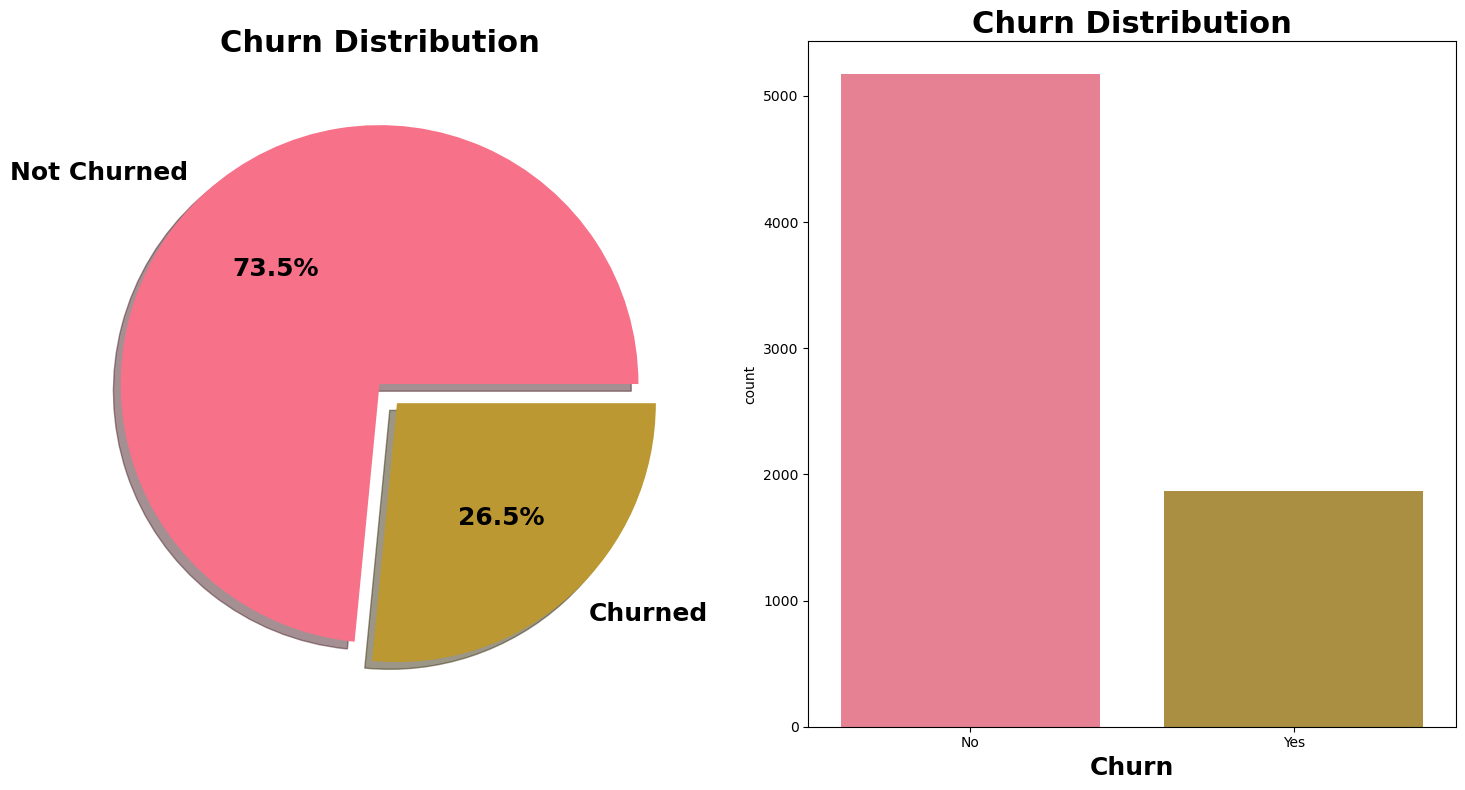

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure style and layout
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plot a pie chart for churn distribution
churn_counts = df['Churn'].value_counts()
explode = [0, 0.1]
labels = ['Not Churned', 'Churned']

# Customize the pie chart appearance
axes[0].pie(churn_counts, explode=explode, labels=labels, autopct='%3.1f%%', 
            textprops={'fontweight': 'bold', 'fontsize': 18}, shadow=True)
axes[0].set_title('Churn Distribution', fontsize=22, fontweight='bold')
axes[0].set_ylabel('')

# Plot a bar chart for churn distribution
sns.countplot('Churn', data=df, ax=axes[1])

# Customize the bar chart appearance
axes[1].set_title('Churn Distribution', fontsize=22, fontweight='bold')
axes[1].set_xlabel("Churn", fontsize=18, fontweight='bold')
axes[1].tick_params(axis='x', labelsize=18, labelweight='grid_aa')

# Display the plot
plt.show()


# Comment:
    
In the past month, 26.4% of customers chose to churn. This is a big amount.As churn is our goal variable, everything above results in an unbalanced data scenario.

Let's begin the examination of Independent features to determine the areas where consumers are dissatisfied and the needs or inclinations of customers in the most cutting-edge competitors.

Gender vs Churn 

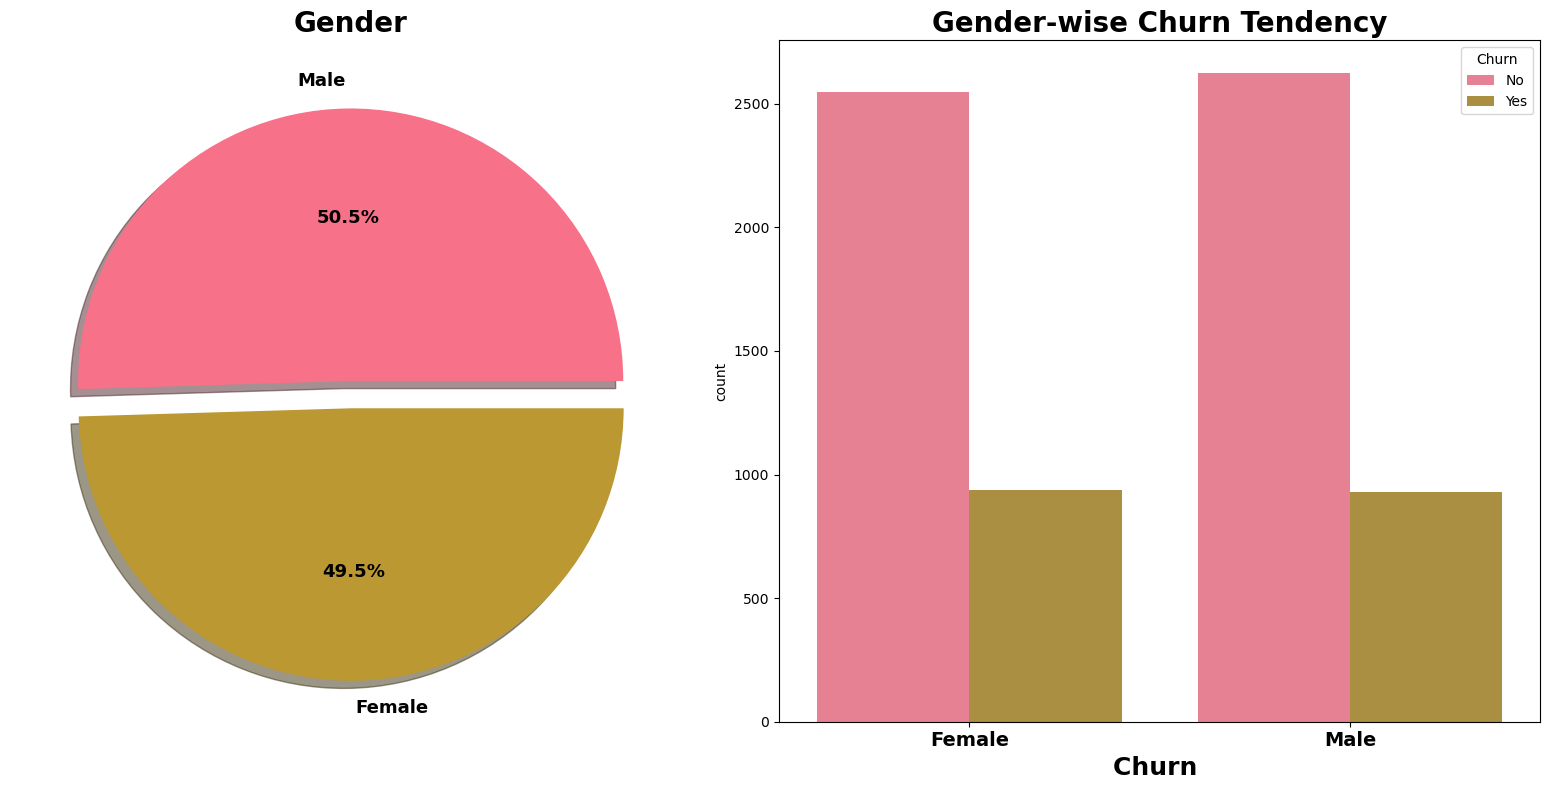

In [36]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('gender',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Gender-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


In [37]:
pd.crosstab(df['gender'],df["Churn"],margins=True).style.background_gradient(cmap='winter_r')

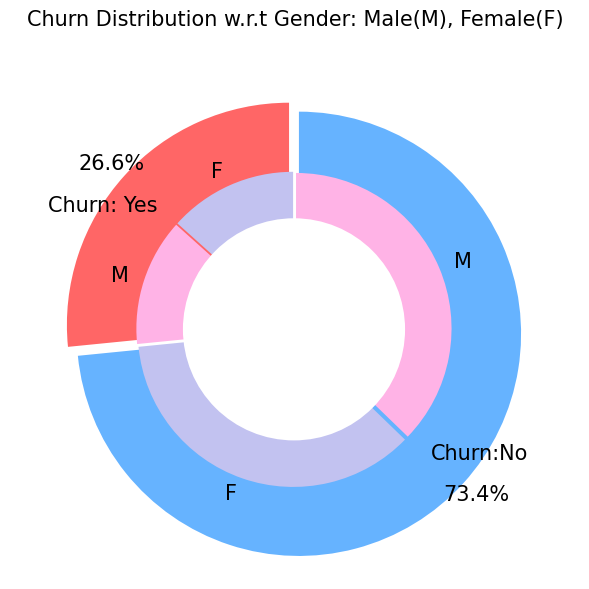

In [38]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

Next, look into the gender-based churn tendency against senior citizens.

Check the percentage of elderly citizens and the senior citizen turnover rate.

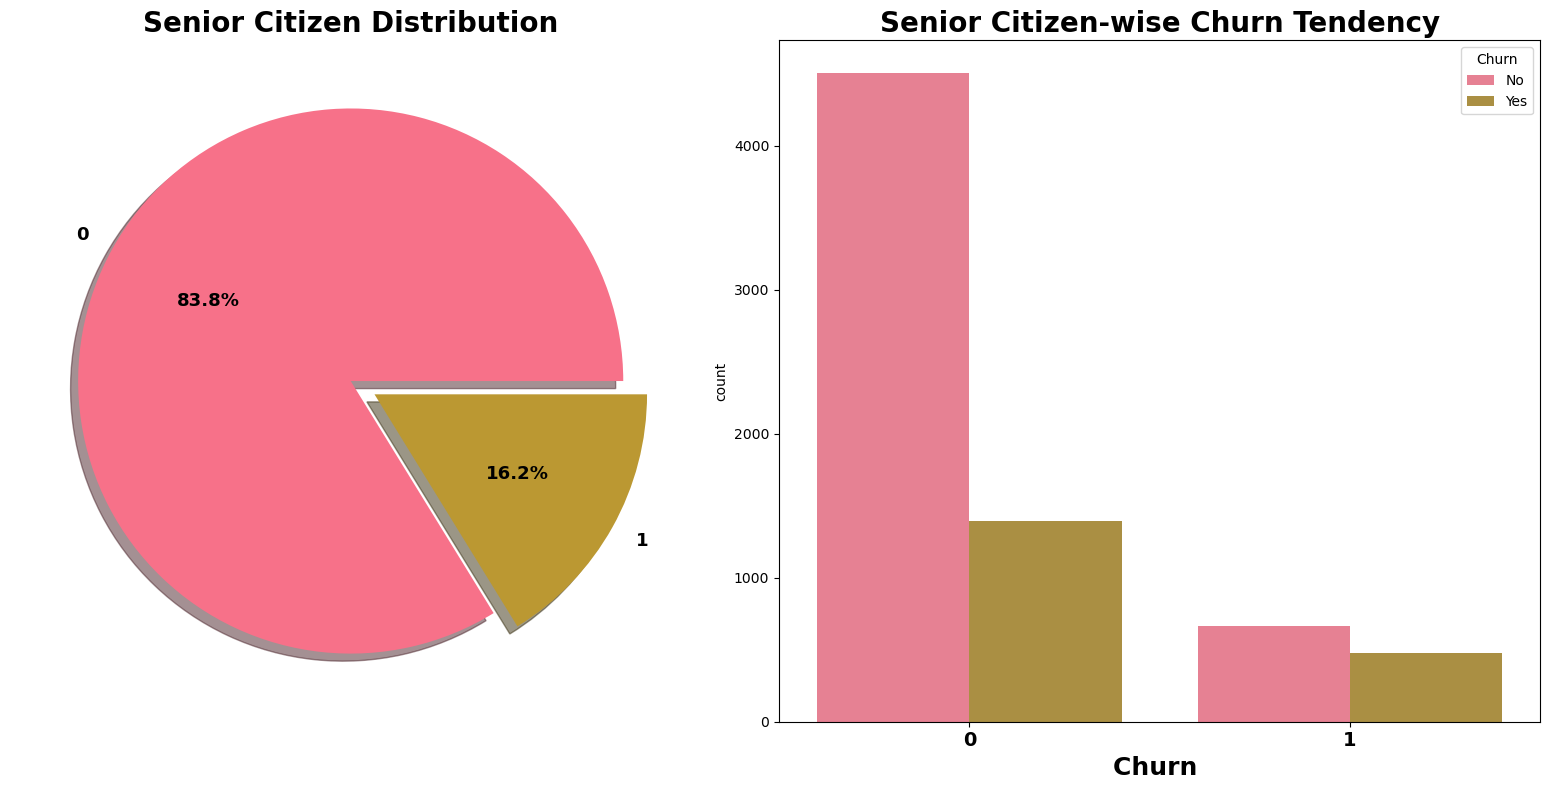

In [39]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Senior Citizen Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('SeniorCitizen',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Senior Citizen-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

Observation:
    
Only 16.3% of the customers are above the age of 60. The statistics shows that young people make up the majority of our clientele.

In [40]:
pd.crosstab([df.gender,df.SeniorCitizen],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

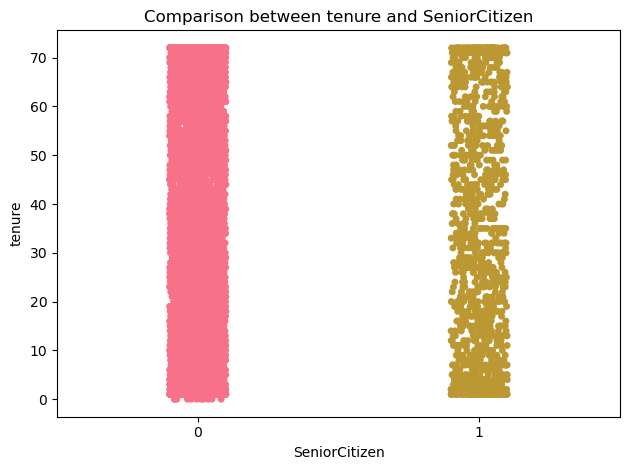

In [41]:
# Comparing tenure and SeniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen",y="tenure",data = df)
plt.show()

Senior citizens make up around 16% of the customer base, and countplot data shows that they have a higher attrition rate.

Senior Citizen and Tenure do not significantly correlate.

Partner and dependents' effects on churn

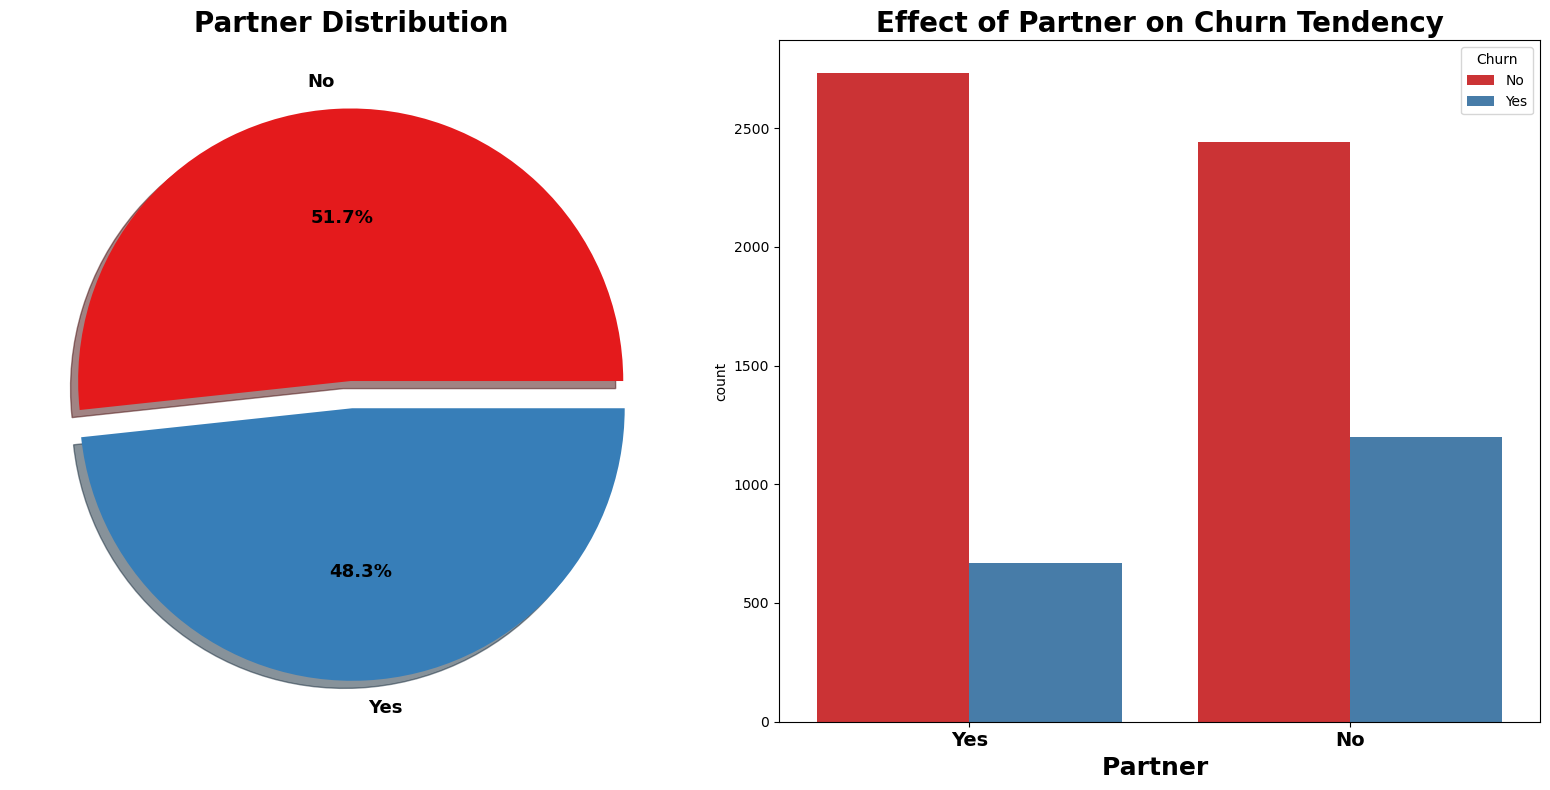

In [42]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Partner Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Partner',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Partner on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Partner ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

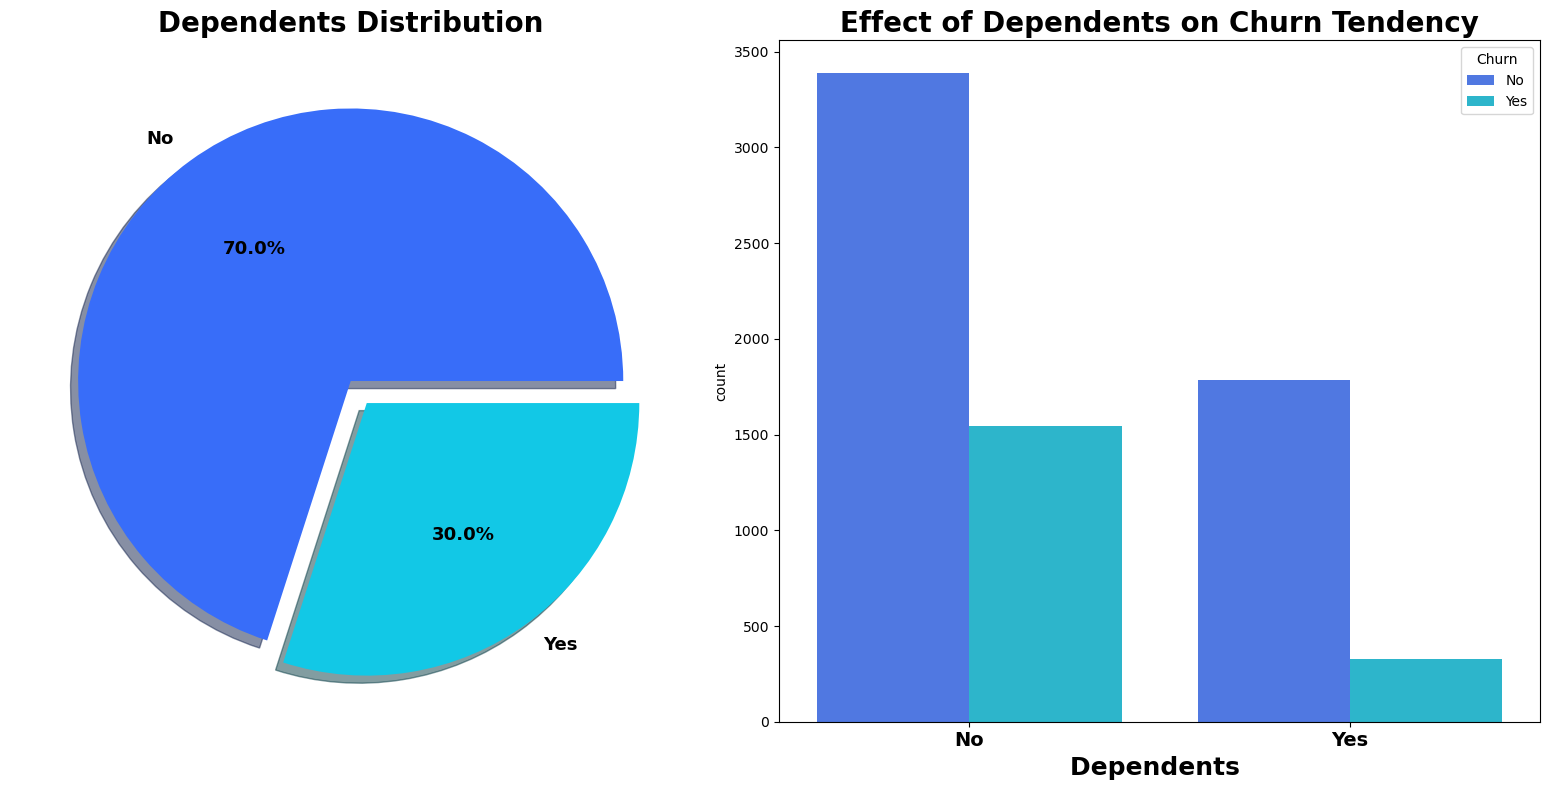

In [43]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Dependents Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Dependents on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

# Observation:

Customers that have a partner have a lower churn rate.
Nearly 30% of their customers are dependent on them, and they are also less likely to leave than the other 70%.

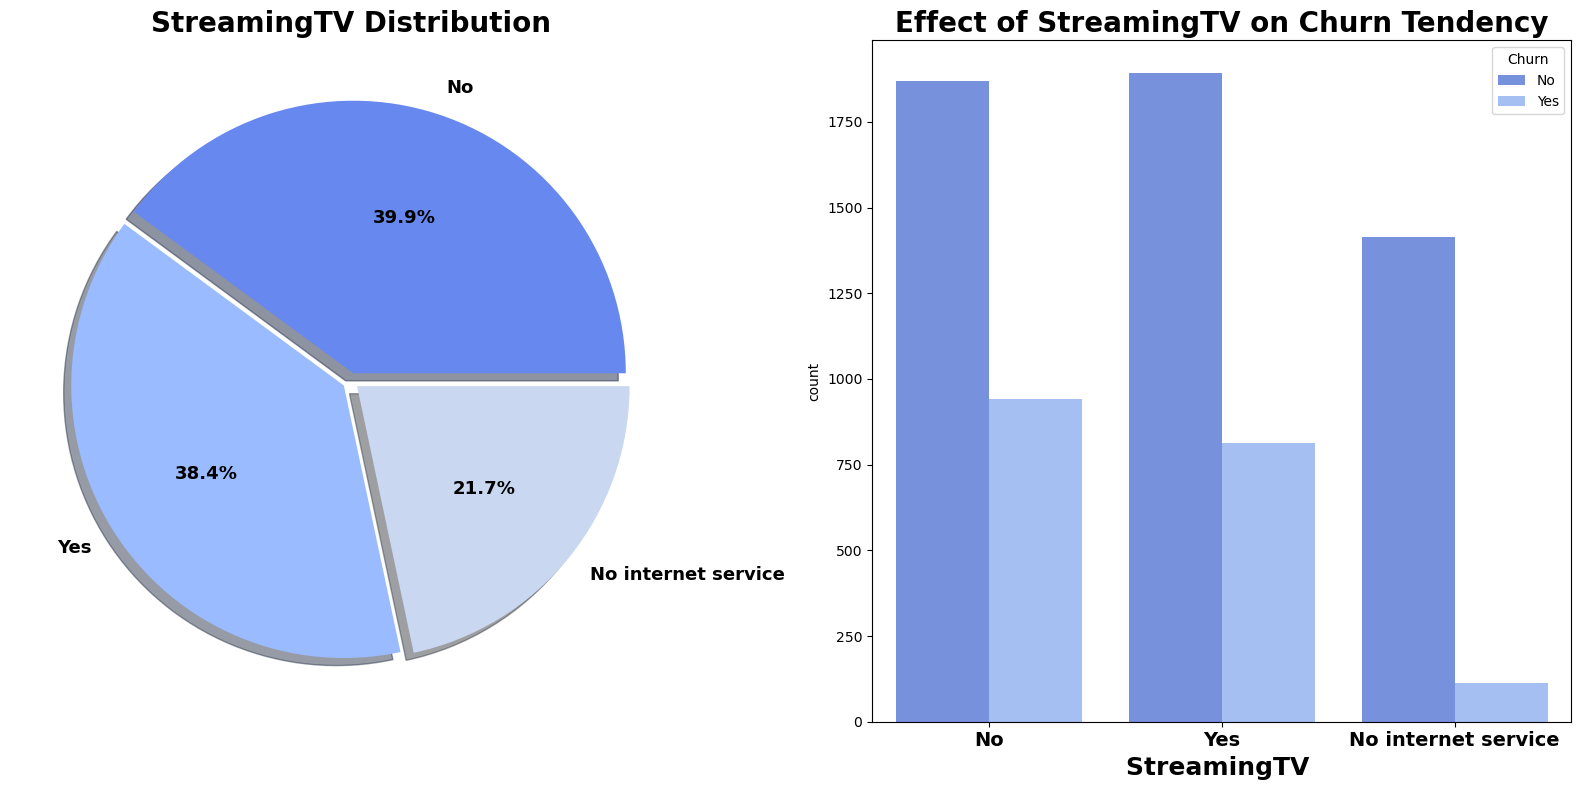

In [44]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingTV Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingTV',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingTV on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingTV ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

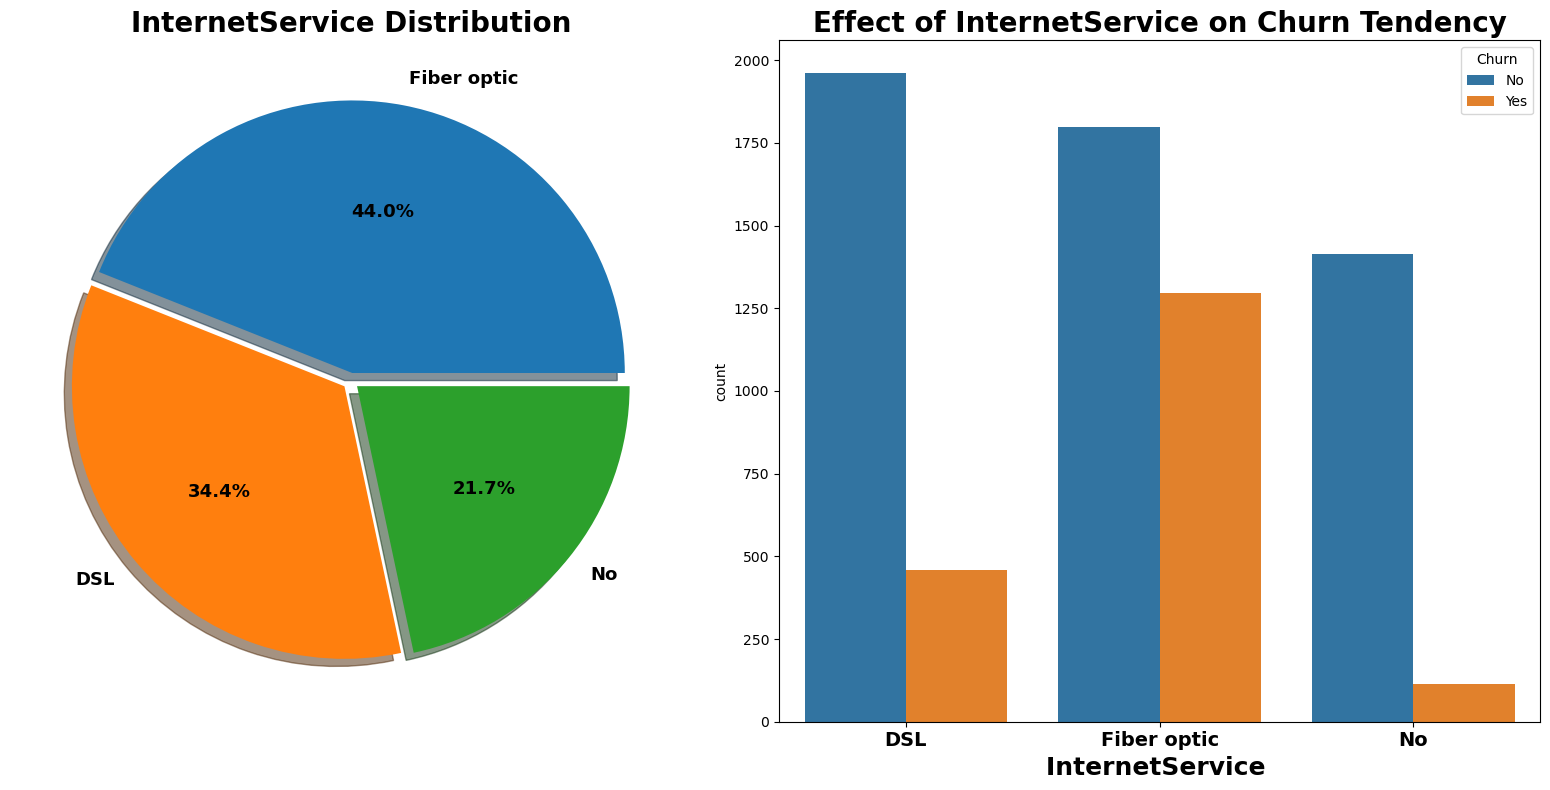

In [45]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('InternetService Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('InternetService',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of InternetService on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("InternetService ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

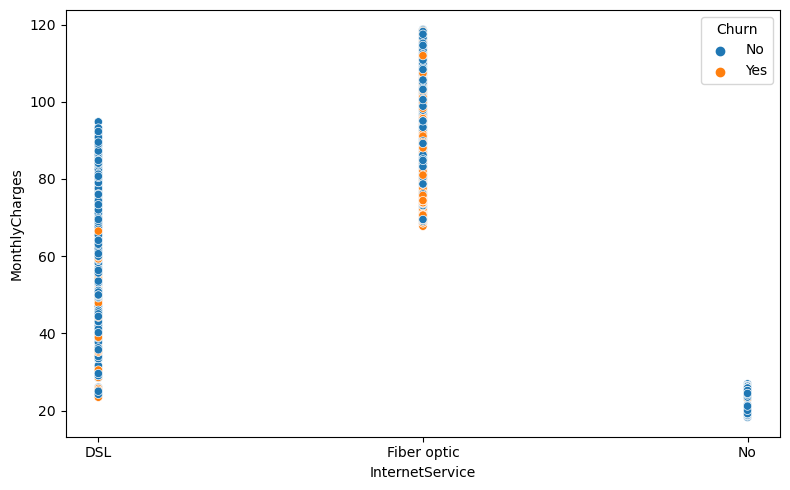

In [46]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="InternetService", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

# Observation:
Fibre optic Internet service is preferred by 44% of customers, yet surprisingly, there is a significant percentage of customer churn among them.

When compared to DSL, customers that use fibre optics can pay higher monthly fees. We can draw the conclusion that client attrition is caused by high fees.

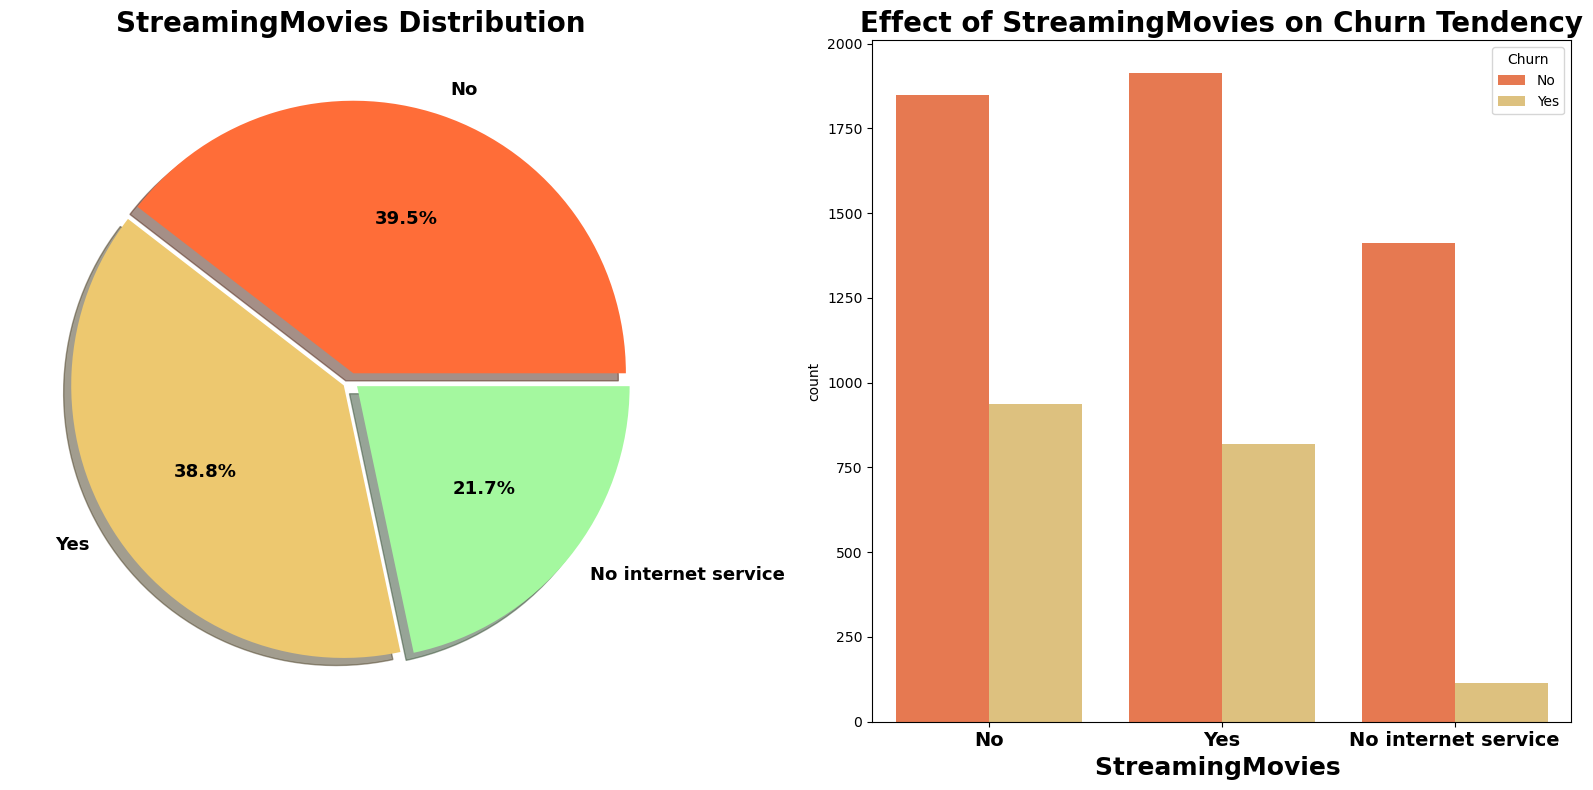

In [47]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingMovies'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingMovies Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingMovies',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingMovies on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingMovies ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

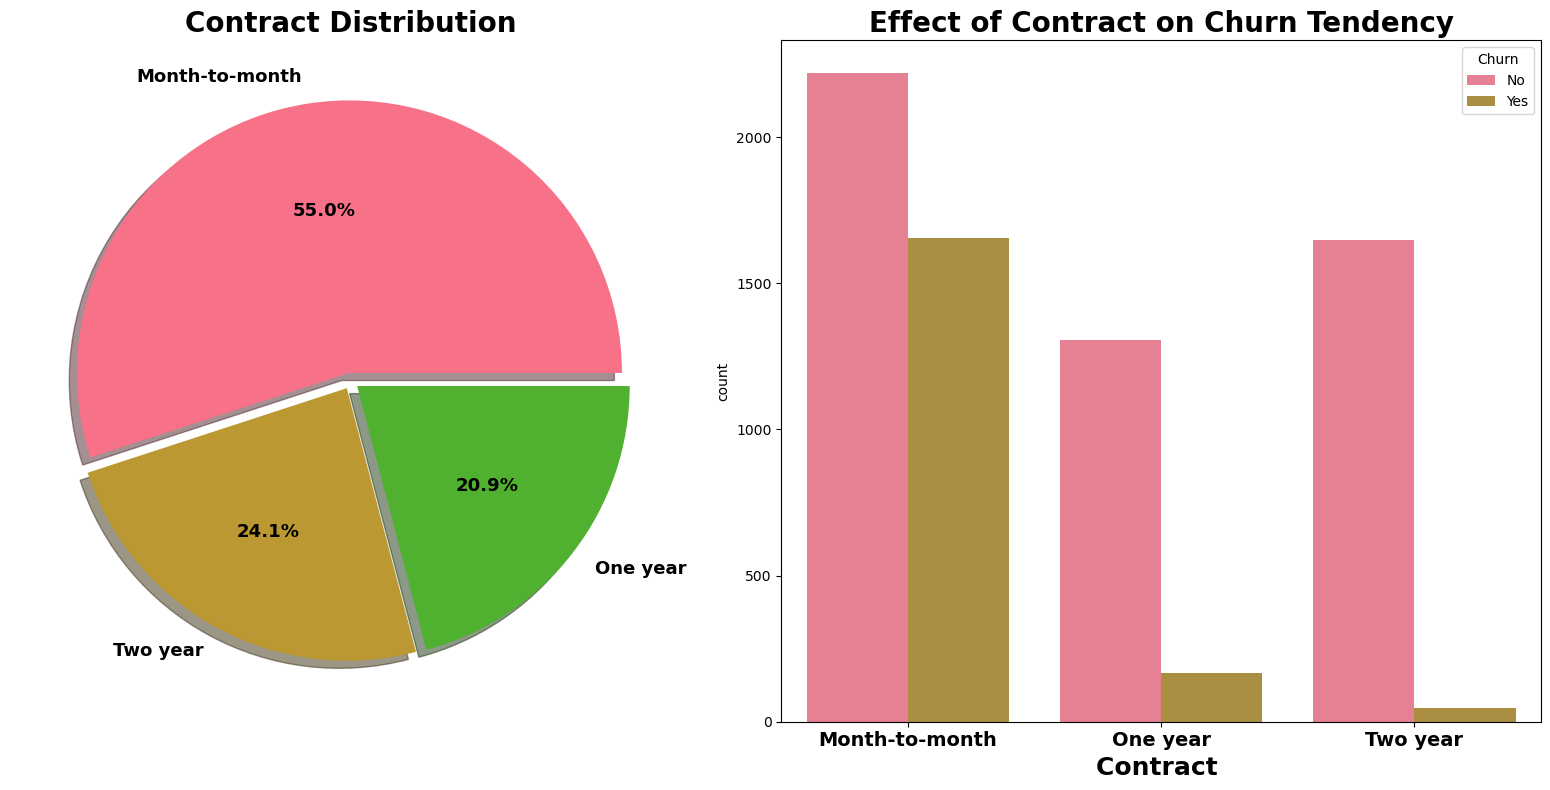

In [48]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Contract Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Contract',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Contract on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Contract ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

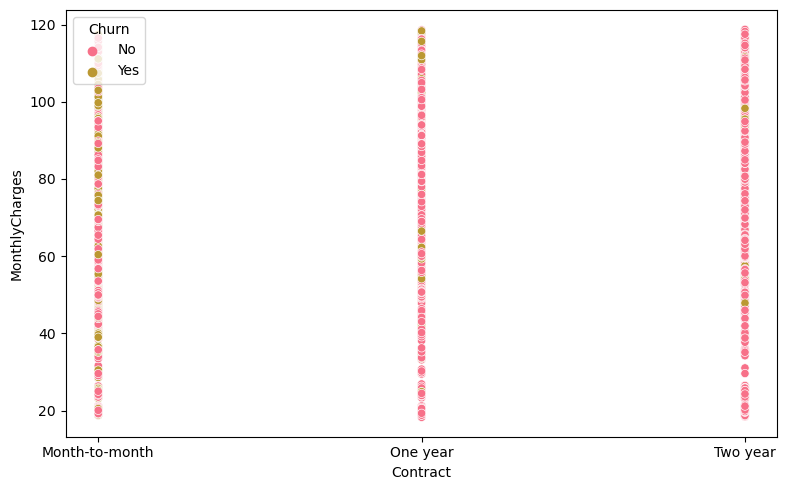

In [49]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

# Observation:
    
Nearly 55% of customers choose monthly contracts over other types.These customers have a high rate of turnover as well.

No correlation between monthly fees and contract length was discovered.

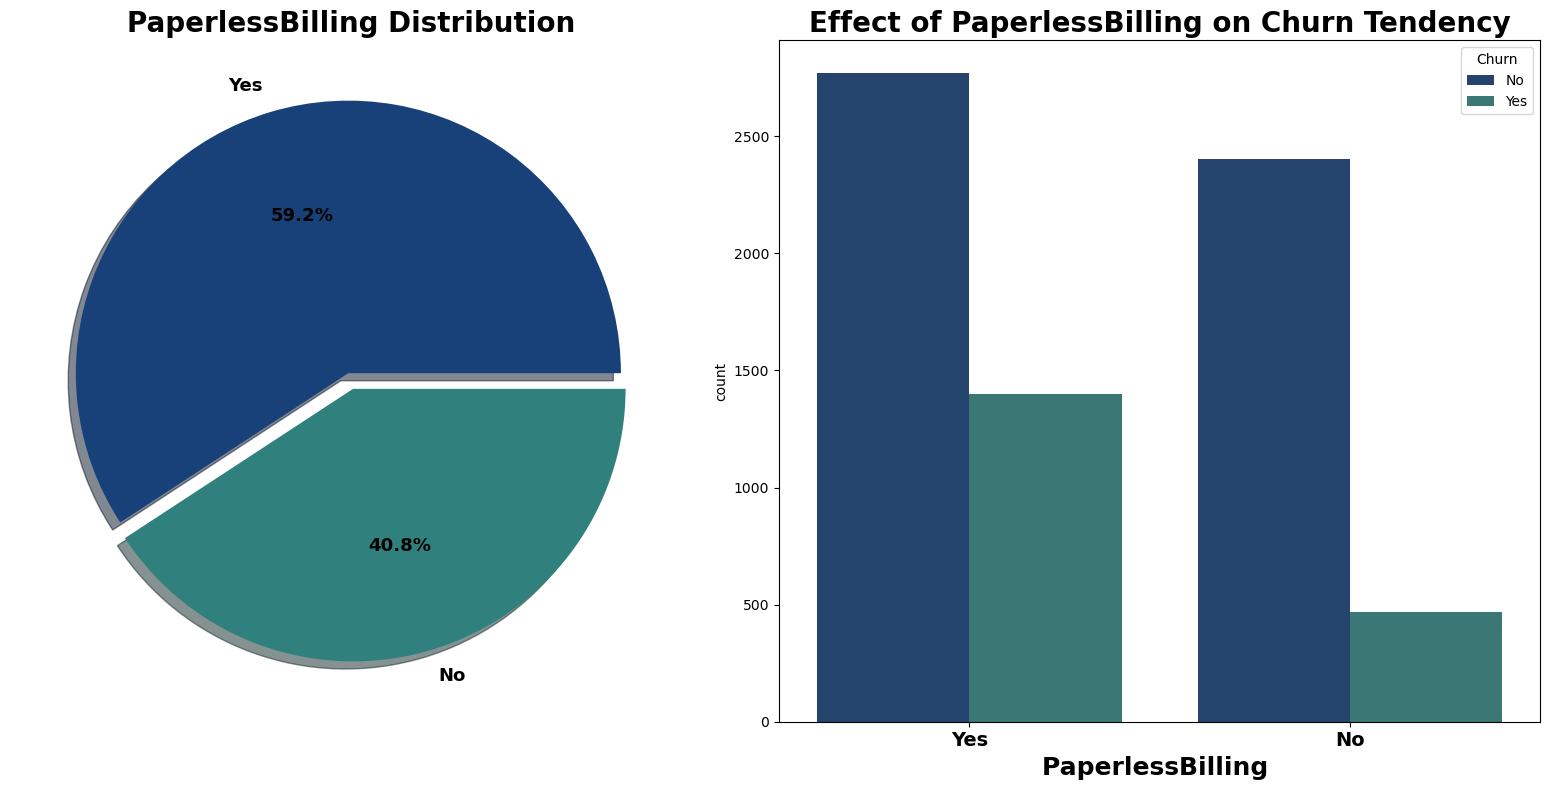

In [50]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_earth')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaperlessBilling'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('PaperlessBilling Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaperlessBilling',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaperlessBilling on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("PaperlessBilling ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

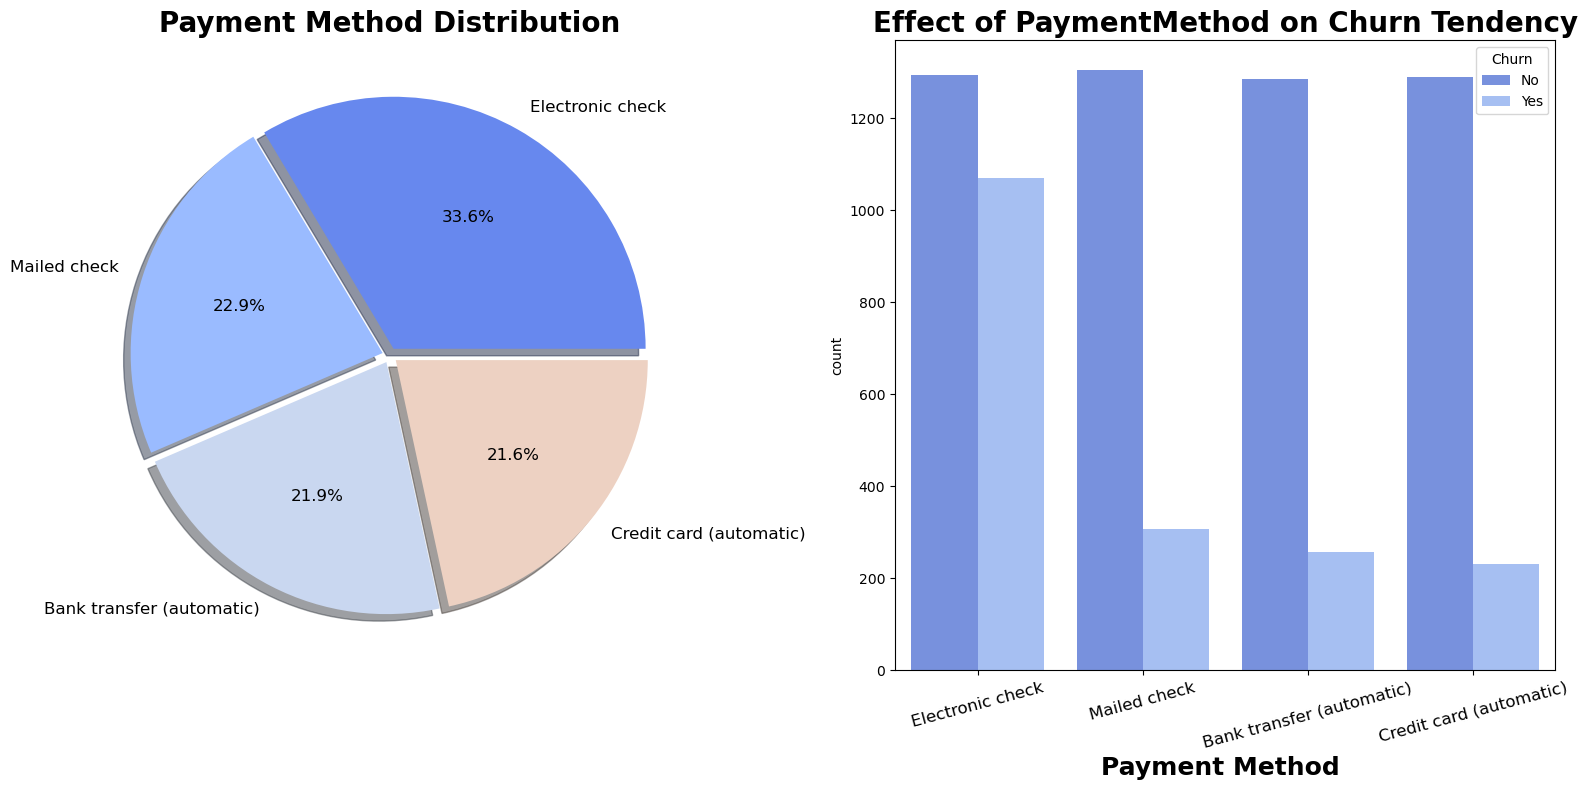

In [51]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaymentMethod'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Payment Method Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaymentMethod',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaymentMethod on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Payment Method ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation=15)
plt.tight_layout()
plt.show()

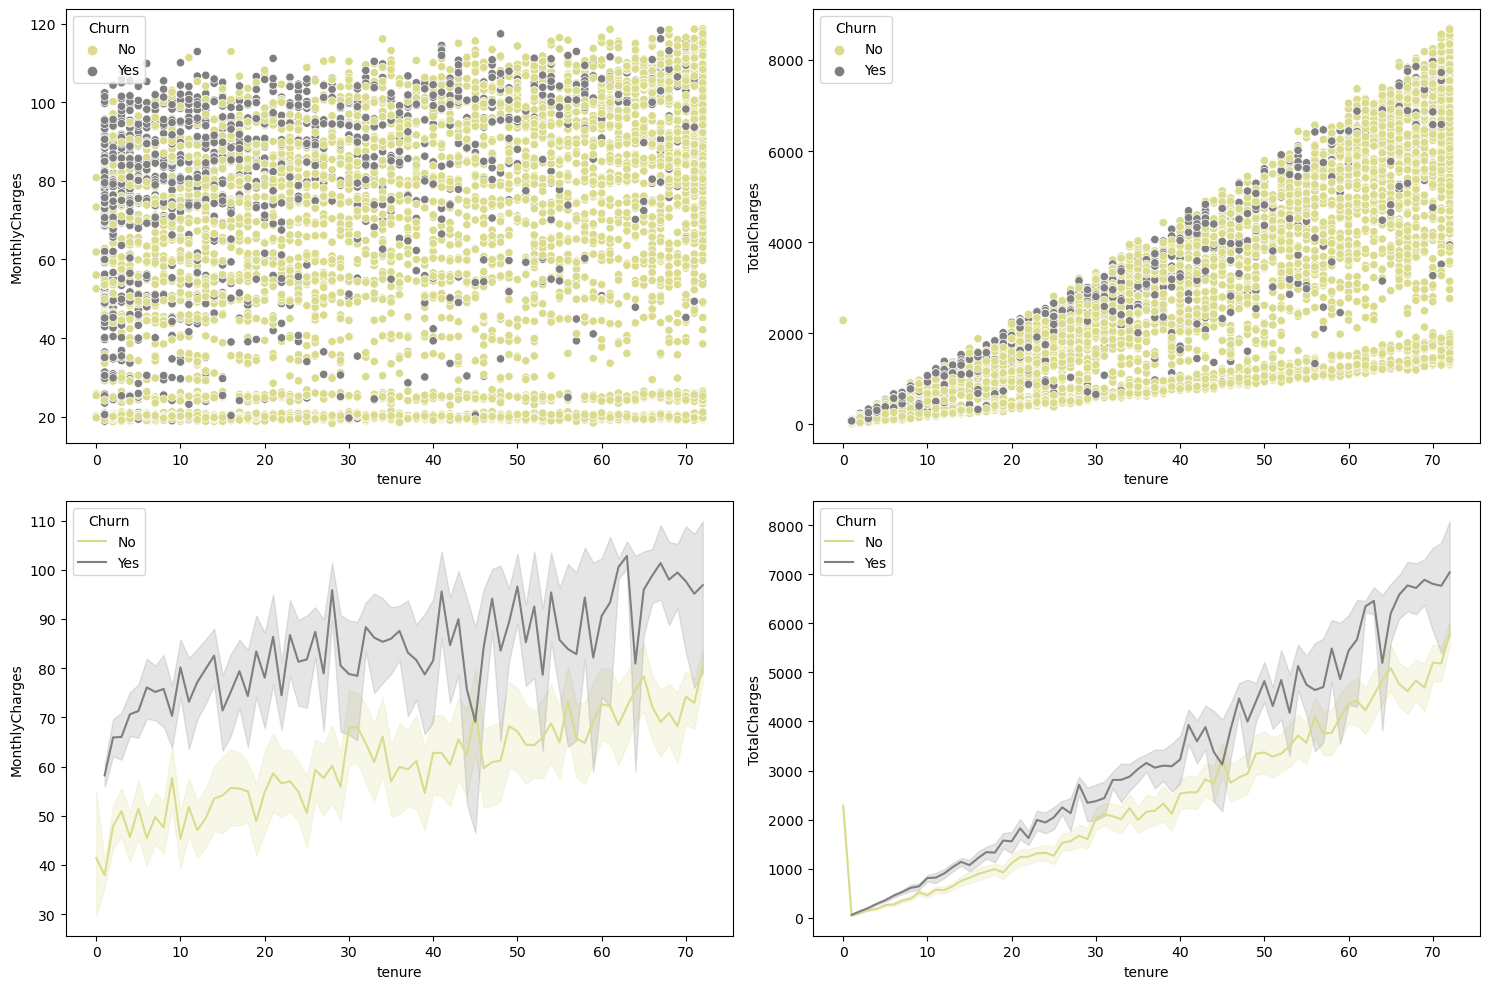

In [52]:
sns.set_palette('tab20_r')
fig , ax=plt.subplots(2,2, figsize=(15,10))
for i,col in enumerate(["MonthlyCharges","TotalCharges"]):
    sns.scatterplot(ax=ax[0,i],x="tenure", y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")

Observation: 
    
Customers that opt to churn have higher monthly costs than the others.

The same is true for customers who opt to churn who have higher total charges than the others.

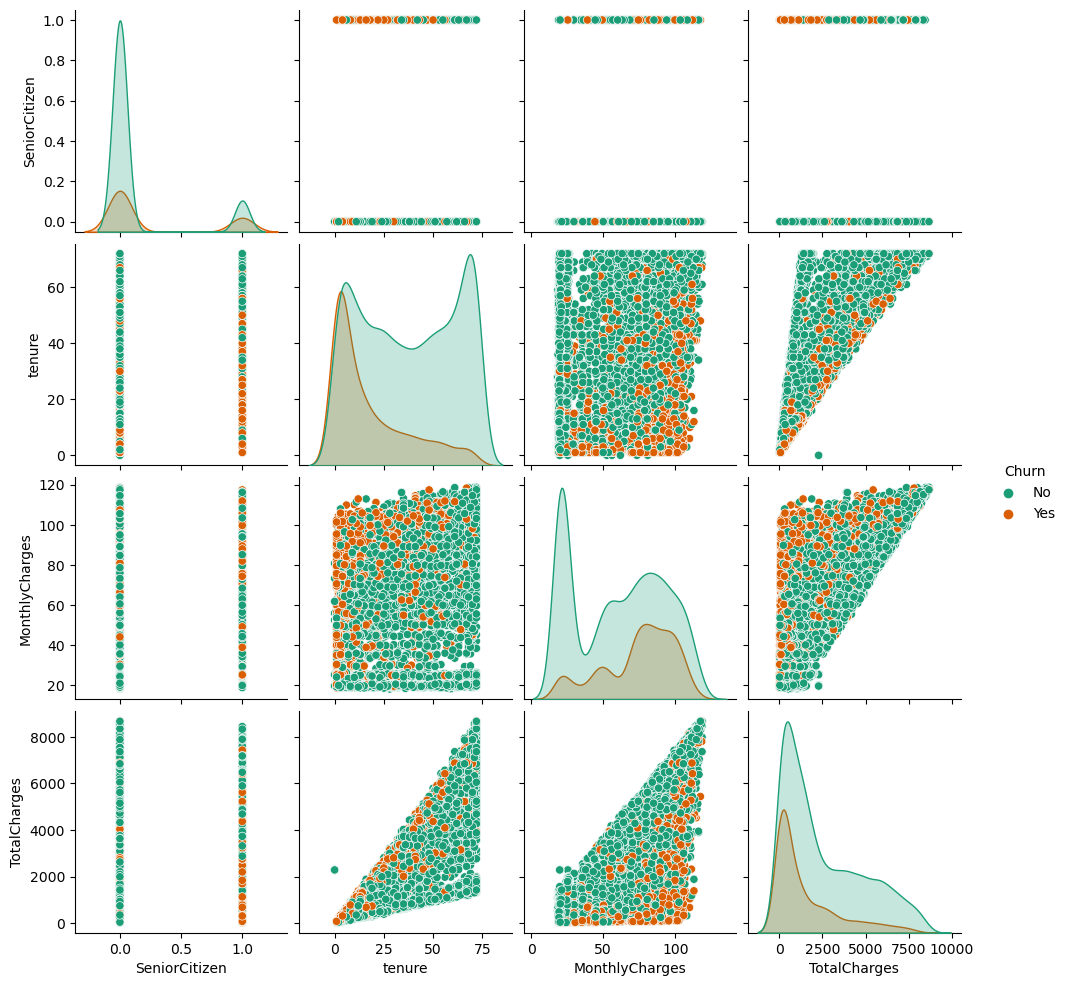

In [53]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

In [54]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [55]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [56]:
Numerical =['tenure','MonthlyCharges', 'TotalCharges']

In [57]:
Category =['gender', 'Partner','PhoneService', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

# Now we will move on to outliers detections and treatment

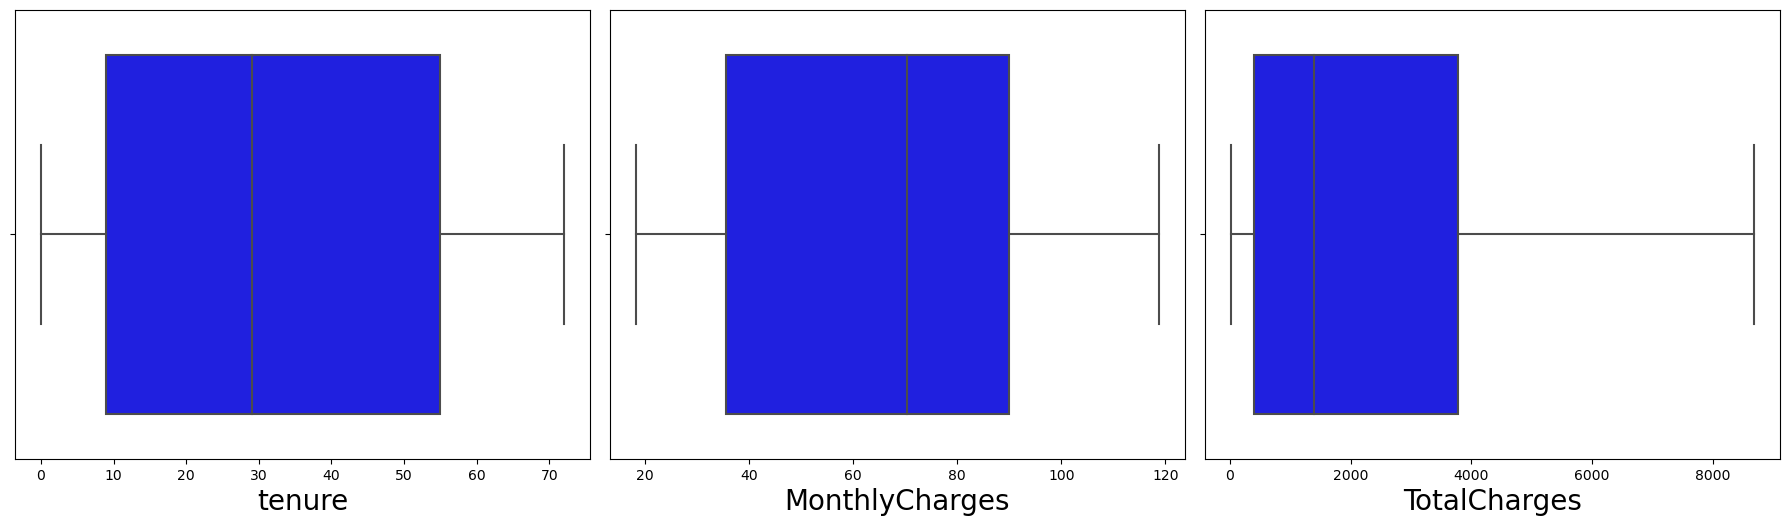

In [59]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Observation:
    
From Boxplot we can observe that No outliers exist in the dataset.

# Utlising z score to remove the outliers


In [60]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataset before removing outliers: ", df.shape)
print ("Shape of the dataset after removing outliers: ", df1.shape)

df=df1.copy()

Shape of the dataset before removing outliers:  (7043, 20)
Shape of the dataset after removing outliers:  (6361, 20)


In [61]:
df.drop(['PhoneService'],axis=1,inplace=True)

Checking Skewness

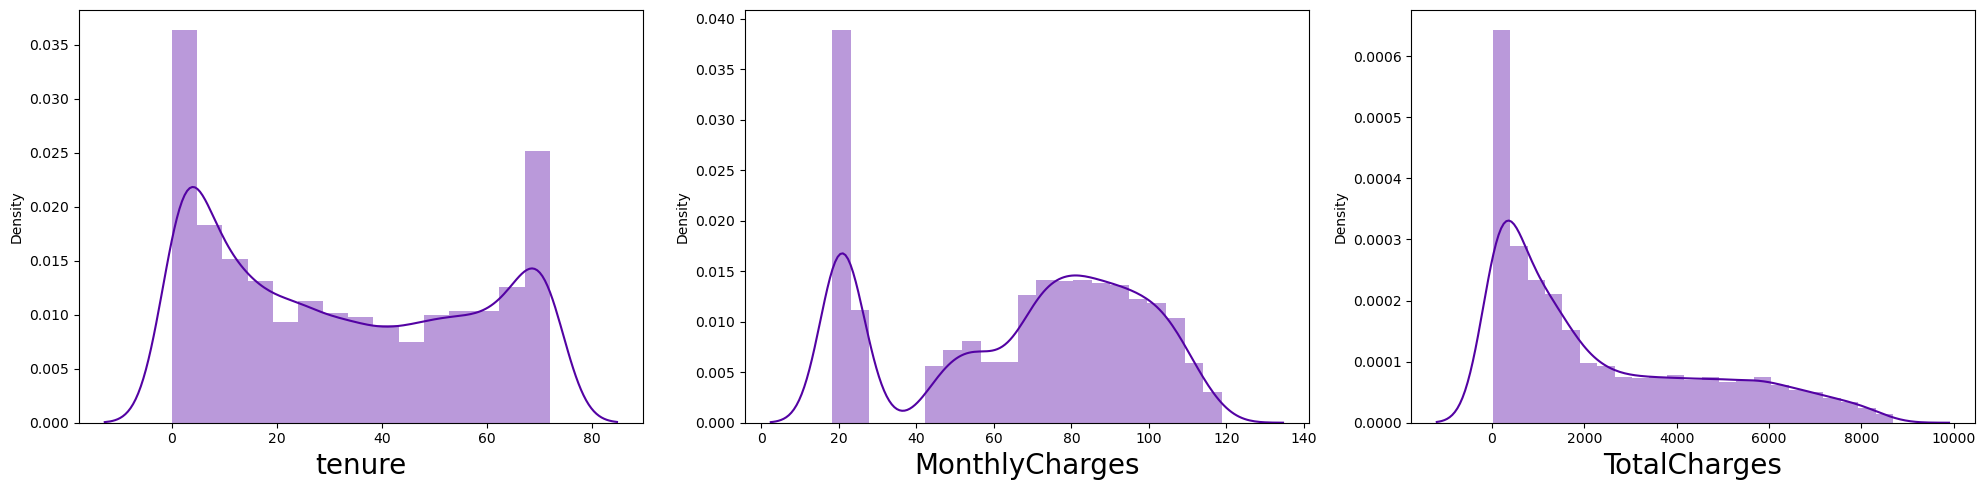

In [62]:
plt.figure(figsize=(20,5),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Observation: 

Skewness is a crucial characteristic for continuous data.

For categorical features and discrete numerical features like month, there is no relevance to sharpness.Therefore, we will disregard any skewness in discrete numerical and categorical features.

In [63]:
df.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges        0.899649
Churn               1.053055
dtype: float64

TotalCharges is skewed in nature from this. which we're going to change in this.

In [64]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])

In [65]:
df.corr()

gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.006666 -0.003095    0.015081  0.000705   
SeniorCitizen    -0.006666       1.000000  0.014985   -0.212450  0.018998   
Partner          -0.003095       0.014985  1.000000    0.454535  0.385531   
Dependents        0.015081      -0.212450  0.454535    1.000000  0.161524   
tenure            0.000705       0.018998  0.385531    0.161524  1.000000   
MultipleLines    -0.007232       0.153645  0.150238   -0.026347  0.360691   
InternetService   0.001883      -0.040567 -0.006811    0.051687 -0.038332   
OnlineSecurity   -0.016543      -0.123628  0.151603    0.146629  0.326014   
OnlineBackup     -0.009229      -0.020639  0.155452    0.090982  0.377266   
DeviceProtection -0.003004      -0.023526  0.168046    0.083529  0.367755   
TechSupport      -0.009510      -0.144616  0.132586    0.130405  0.324150   
StreamingTV      -0.005602       0.028561  0.134436    0.049732  0.283530   
StreamingMovies  -0.002749       0.047145  0.128787    0.024854  0.293767   
Contract         -0.000091      -0.139921  0.299346    0.243697  0.675544   
PaperlessBilling -0.018561       0.155571 -0.009456   -0.106037  0.003627   
PaymentMethod     0.023108      -0.043247 -0.150912   -0.039747 -0.364802   
MonthlyCharges   -0.013267       0.239209  0.091645   -0.129008  0.245389   
TotalCharges     -0.009136       0.113226  0.341936    0.088603  0.827466   
Churn            -0.011212       0.148802 -0.154692   -0.159481 -0.349681   

                  MultipleLines  InternetService  OnlineSecurity  \
gender                -0.007232         0.001883       -0.016543   
SeniorCitizen          0.153645        -0.040567       -0.123628   
Partner                0.150238        -0.006811        0.151603   
Dependents            -0.026347         0.051687        0.146629   
tenure                 0.360691        -0.038332        0.326014   
MultipleLines          1.000000        -0.109861        0.007312   
InternetService       -0.109861         1.000000       -0.026160   
OnlineSecurity         0.007312        -0.026160        1.000000   
OnlineBackup           0.125802         0.031031        0.199192   
DeviceProtection       0.130775         0.050406        0.174330   
TechSupport            0.011859        -0.021632        0.284134   
StreamingTV            0.188227         0.099601        0.047993   
StreamingMovies        0.194299         0.094262        0.063601   
Contract               0.116643         0.112766        0.367511   
PaperlessBilling       0.174347        -0.165694       -0.155053   
PaymentMethod         -0.186049         0.100110       -0.089331   
MonthlyCharges         0.456223        -0.472724       -0.072293   
TotalCharges           0.461046        -0.264991        0.206461   
Churn                  0.040207        -0.059137       -0.290086   

                  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
gender               -0.009229         -0.003004    -0.009510    -0.005602   
SeniorCitizen        -0.020639         -0.023526    -0.144616     0.028561   
Partner               0.155452          0.168046     0.132586     0.134436   
Dependents            0.090982          0.083529     0.130405     0.049732   
tenure                0.377266          0.367755     0.324150     0.283530   
MultipleLines         0.125802          0.130775     0.011859     0.188227   
InternetService       0.031031          0.050406    -0.021632     0.099601   
OnlineSecurity        0.199192          0.174330     0.284134     0.047993   
OnlineBackup          1.000000          0.196737     0.211105     0.152935   
DeviceProtection      0.196737          1.000000     0.242925     0.279173   
TechSupport           0.211105          0.242925     1.000000     0.175267   
StreamingTV           0.152935          0.279173     0.175267     1.000000   
StreamingMovies       0.140898          0.285475     0.180595     0.430815   
Contract              0.28

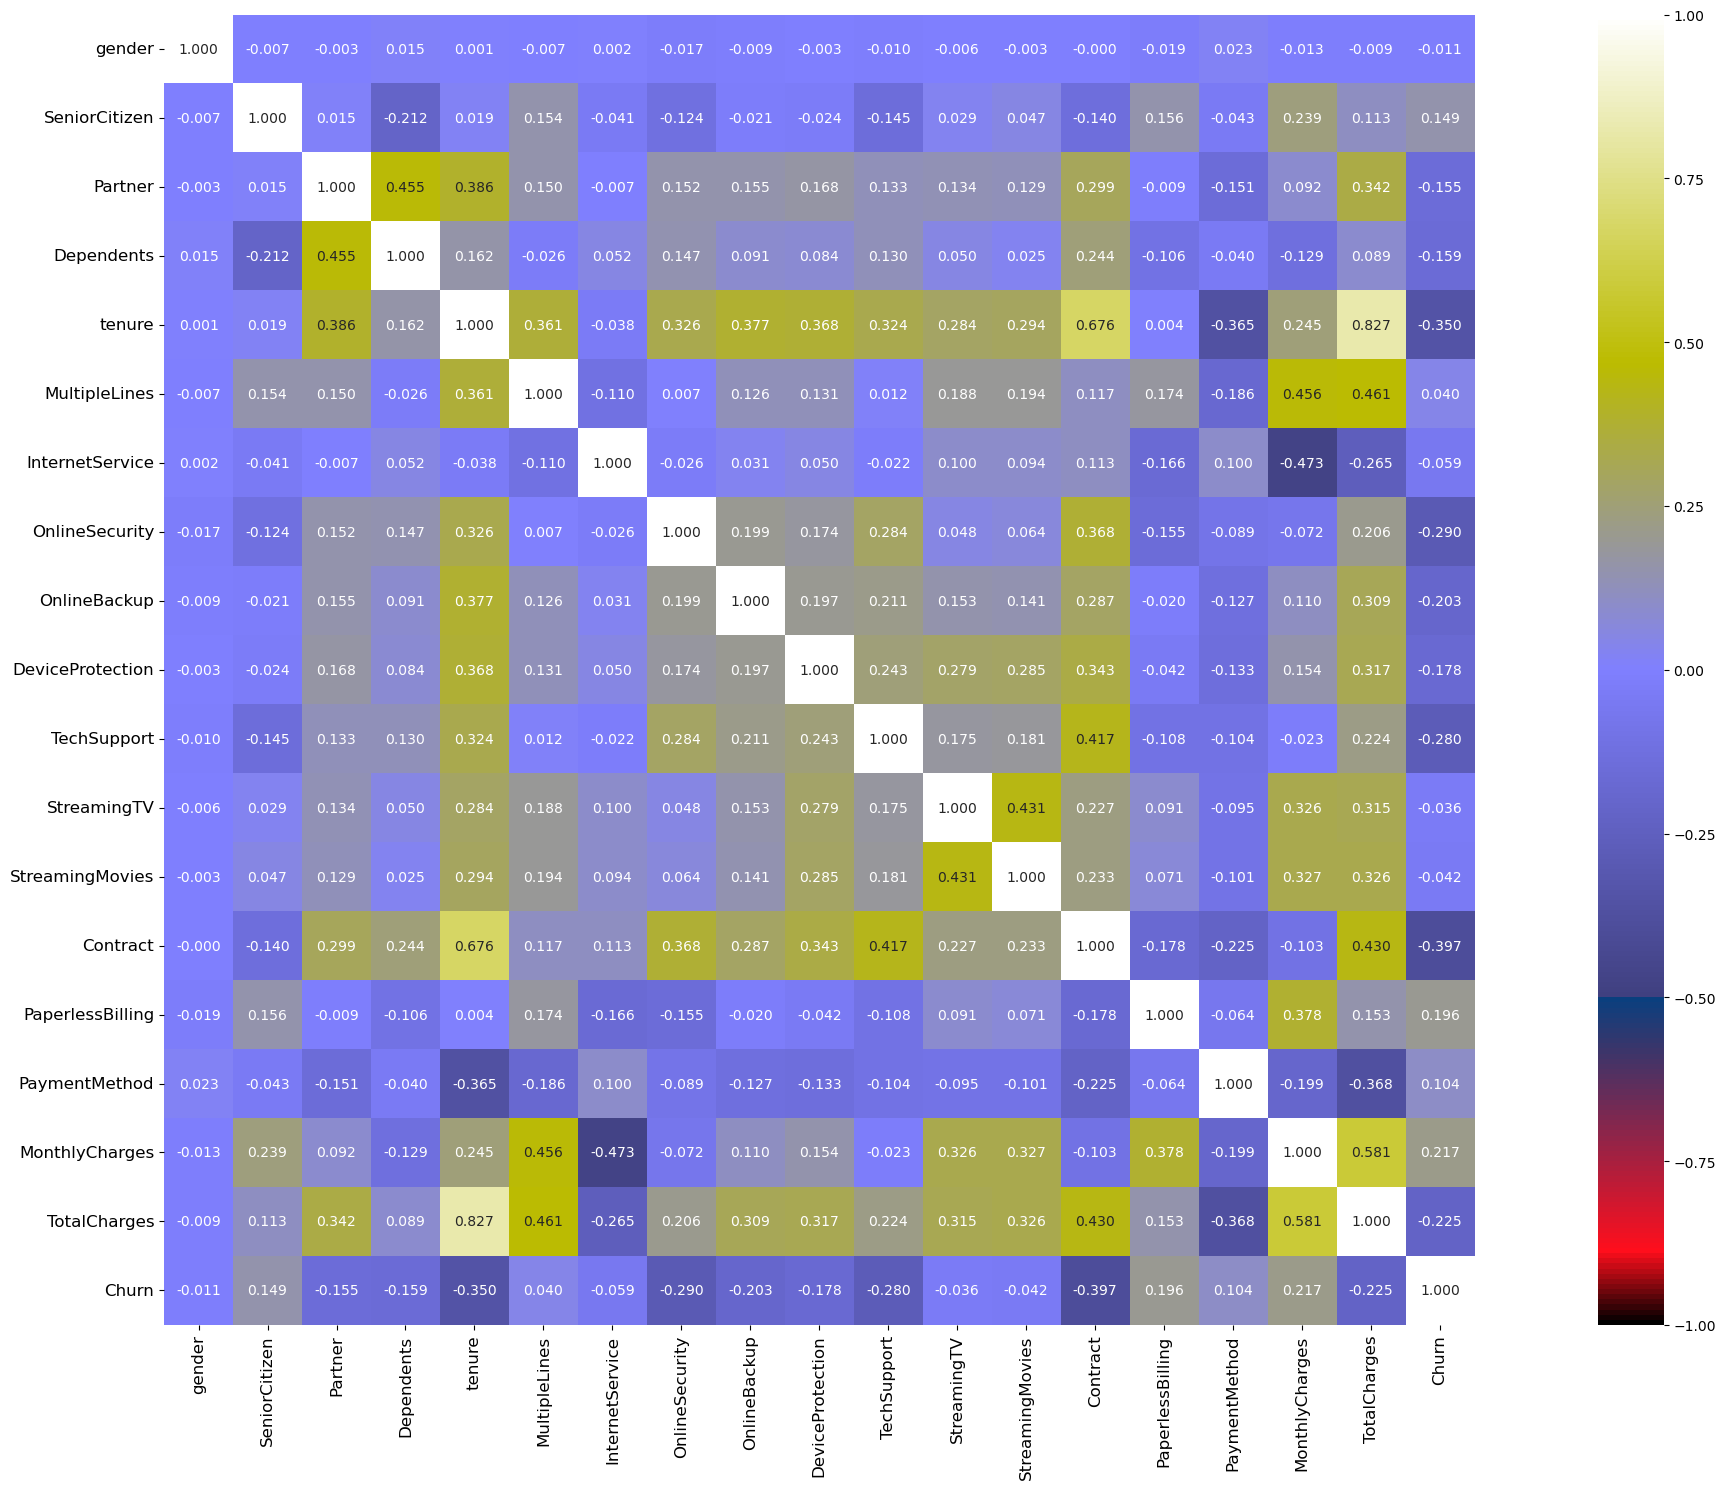

In [66]:
# USing Heatmap

plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

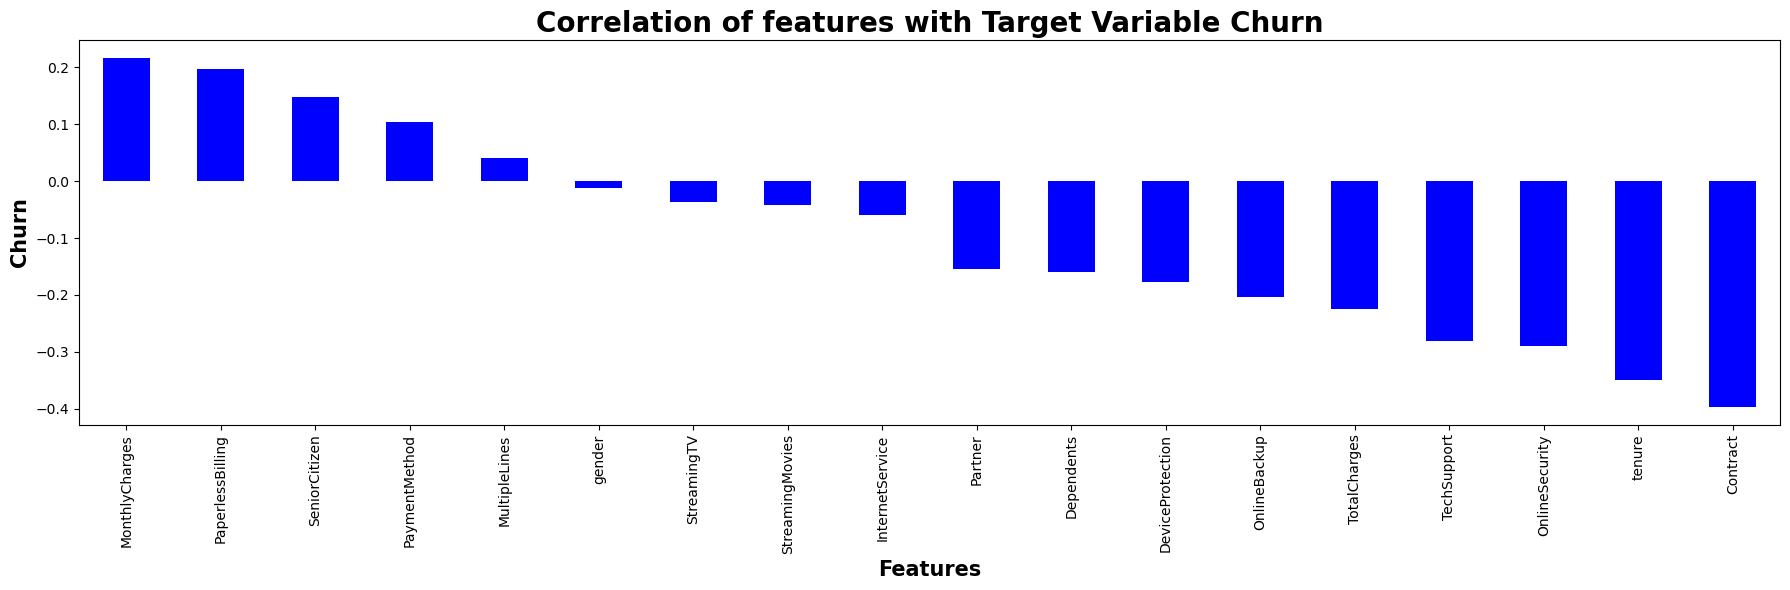

In [68]:
plt.figure(figsize = (18,6))
df.corr()['Churn'].drop(['Churn']).sort_values(ascending=False).plot(kind='bar',color = 'blue')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Churn',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Churn',fontsize = 20,fontweight='bold')
plt.show()

In [70]:
# Balancing the dataset's target variable

In [71]:
df.Churn.value_counts()

0    4662
1    1699
Name: Churn, dtype: int64

In [72]:
#Balancing using SMOTE

In [73]:
from imblearn.over_sampling import SMOTE
X = df.drop(['Churn'], axis =1)
Y = df['Churn']
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
Y.value_counts()

0    4662
1    4662
Name: Churn, dtype: int64

# Not the target variable is balanced

In [74]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

Making use of the variance_inflation_factor to examine multicollinearity between features

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.015499            gender
1     1.095584     SeniorCitizen
2     1.533357           Partner
3     1.423531        Dependents
4     6.508898            tenure
5     1.438501     MultipleLines
6     1.461524   InternetService
7     1.345920    OnlineSecurity
8     1.241790      OnlineBackup
9     1.307318  DeviceProtection
10    1.398490       TechSupport
11    1.511095       StreamingTV
12    1.494719   StreamingMovies
13    2.534468          Contract
14    1.176566  PaperlessBilling
15    1.187209     PaymentMethod
16    3.230134    MonthlyCharges
17    6.078118      TotalCharges

Distinct feature VIF is within the permitted range of 10

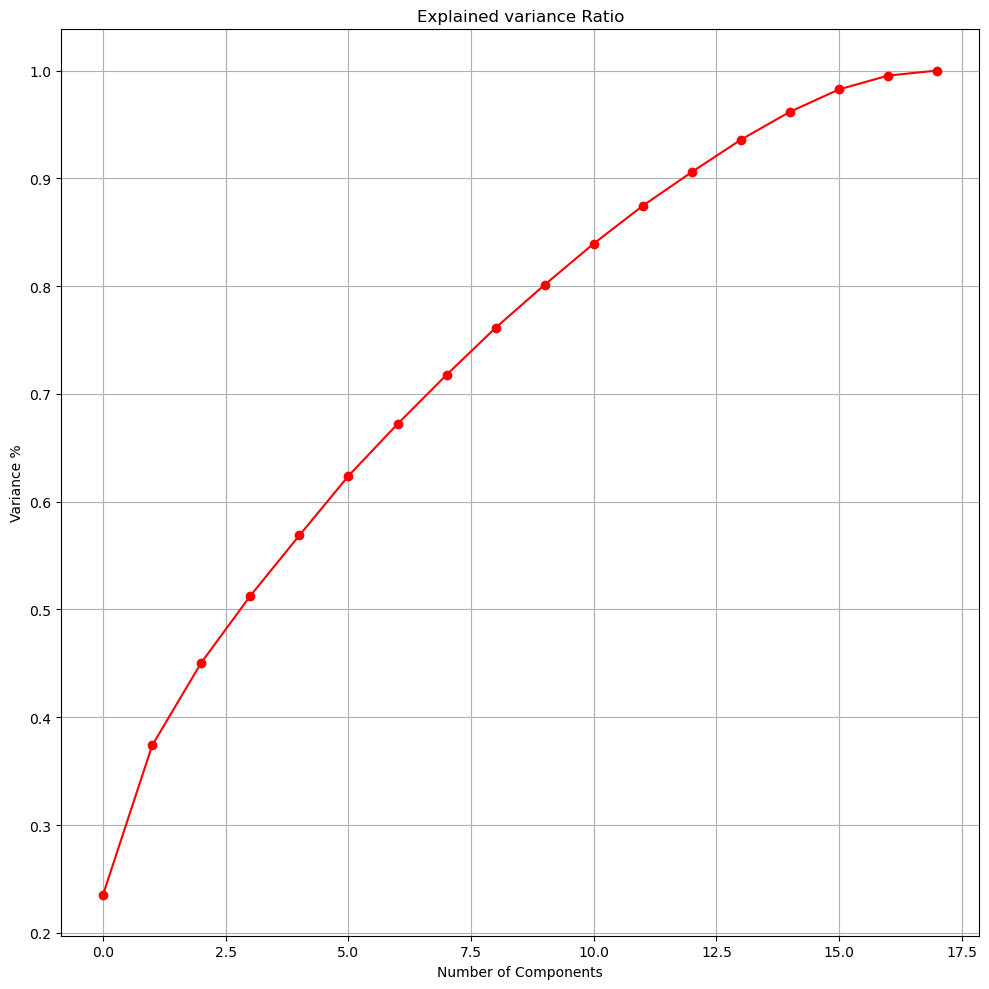

In [76]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

# Comment 

From the graph, it is clear that 13 primary components account for 90% of the data's volatility. The first 13 components will be used in our prediction.

In [77]:
pca_new = PCA(n_components=13)
x_new = pca_new.fit_transform(X_scale)

In [78]:
principle_x=pd.DataFrame(x_new,columns=np.arange(13))

# Machine Learning Model

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6526, 13)
Training target vector size: (6526,)
Test feature matrix size: (2798, 13)
Test target vector size: (2798,)


Now let's find out the best random state

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8112937812723374 on Random_state 202


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=90, test_size=.3)

# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

# Predict the target variable on the test set
y_pred = log_reg.predict(X_test)

# Print the evaluation metrics
print('\033[1m' + 'Logistic Regression Evaluation' + '\033[0m')
print('\n')
print('\033[1m' + 'Accuracy Score of Logistic Regression: ' + '\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m' + 'Confusion Matrix of Logistic Regression: ' + '\033[0m \n', confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m' + 'Classification Report of Logistic Regression: ' + '\033[0m \n', classification_report(Y_test, y_pred))


Logistic Regression Evaluation


Accuracy Score of Logistic Regression:  0.7969978556111508


Confusion Matrix of Logistic Regression:  
 [[1058  356]
 [ 212 1172]]


Classification Report of Logistic Regression:  
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      1414
           1       0.77      0.85      0.80      1384

    accuracy                           0.80      2798
   macro avg       0.80      0.80      0.80      2798
weighted avg       0.80      0.80      0.80      2798



# Now lets find out the optimal value of n neighbor for KNN

In [83]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse_val = []  # to store RMSE values for different k

for k in range(1, 21):
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)  # fit the model
    y_pred = model.predict(X_test)  # make predictions on the test set
    error = sqrt(mean_squared_error(Y_test, y_pred))  # calculate RMSE
    rmse_val.append(error)  # store RMSE values
    print(f"RMSE value for k = {k} is: {error:.4f}")


RMSE value for k = 1 is: 0.4722
RMSE value for k = 2 is: 0.4901
RMSE value for k = 3 is: 0.4707
RMSE value for k = 4 is: 0.4681
RMSE value for k = 5 is: 0.4642
RMSE value for k = 6 is: 0.4627
RMSE value for k = 7 is: 0.4638
RMSE value for k = 8 is: 0.4615
RMSE value for k = 9 is: 0.4650
RMSE value for k = 10 is: 0.4635
RMSE value for k = 11 is: 0.4681
RMSE value for k = 12 is: 0.4665
RMSE value for k = 13 is: 0.4600
RMSE value for k = 14 is: 0.4600
RMSE value for k = 15 is: 0.4696
RMSE value for k = 16 is: 0.4681
RMSE value for k = 17 is: 0.4665
RMSE value for k = 18 is: 0.4665
RMSE value for k = 19 is: 0.4707
RMSE value for k = 20 is: 0.4646


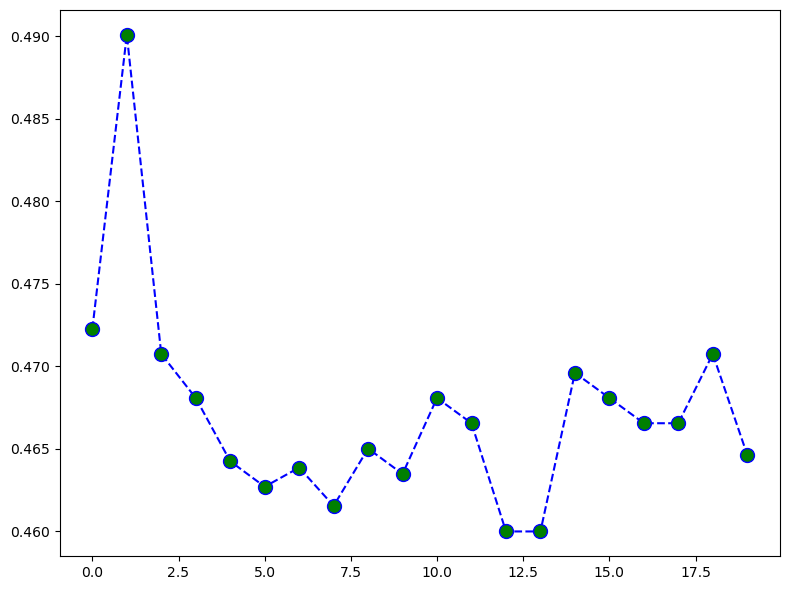

In [84]:
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.show()

Applying other classification

In [85]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=18),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    print('\033[1m' + f'Classification ML Algorithm Evaluation: {model_name}' + '\033[0m')
    print('\n')
    print('\033[1m' + 'Accuracy Score:' + '\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Confusion Matrix:' + '\033[0m \n', confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Classification Report:' + '\033[0m \n', classification_report(Y_test, y_pred))
    print('\n')


Classification ML Algorithm Evaluation: Logistic Regression


Accuracy Score:
 0.7969978556111508


Confusion Matrix: 
 [[1058  356]
 [ 212 1172]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      1414
           1       0.77      0.85      0.80      1384

    accuracy                           0.80      2798
   macro avg       0.80      0.80      0.80      2798
weighted avg       0.80      0.80      0.80      2798



Classification ML Algorithm Evaluation: SVC


Accuracy Score:
 0.812723373838456


Confusion Matrix: 
 [[1087  327]
 [ 197 1187]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      1414
           1       0.78      0.86      0.82      1384

    accuracy                           0.81      2798
   macro avg       0.82      0.81      0.81      2798
weighted avg       0.82      0.81      0.81      2798



Classificat

# CrossValidation:

In [86]:
from sklearn.model_selection import cross_val_score

models = [
    LogisticRegression(),
    SVC(),
    GaussianNB(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=18),
    RandomForestClassifier(),
    ExtraTreesClassifier()
]

for model in models:
    scores = cross_val_score(model, principle_x, Y, cv=5)
    model_name = model.__class__.__name__

    print('\n')
    print('\033[1m' + f'Cross Validation Score: {model_name}' + '\033[0m')
    print('\n')
    print('\033[1m' + 'Scores:' + '\033[0m', scores)
    print('\033[1m' + 'Mean Score:' + '\033[0m', scores.mean())
    print('\033[1m' + 'Standard Deviation:' + '\033[0m', scores.std())
    print('\n')




Cross Validation Score: LogisticRegression


Scores: [0.75871314 0.74101877 0.79142091 0.80214477 0.80418455]
Mean Score: 0.779496427297518
Standard Deviation: 0.025207616887162845




Cross Validation Score: SVC


Scores: [0.7458445  0.74691689 0.8075067  0.82734584 0.82939914]
Mean Score: 0.7914026165299337
Standard Deviation: 0.03754867404355761




Cross Validation Score: GaussianNB


Scores: [0.71689008 0.71635389 0.79785523 0.8075067  0.80847639]
Mean Score: 0.769416458594622
Standard Deviation: 0.043266536163685906




Cross Validation Score: DecisionTreeClassifier


Scores: [0.69061662 0.7227882  0.79946381 0.79410188 0.79399142]
Mean Score: 0.7601923851384781
Standard Deviation: 0.044887263896820274




Cross Validation Score: KNeighborsClassifier


Scores: [0.75764075 0.75174263 0.79302949 0.80536193 0.81759657]
Mean Score: 0.7850742730902438
Standard Deviation: 0.02606212136918426




Cross Validation Score: RandomForestClassifier


Scores: [0.73458445 0.75013405 0.8353887

# Lets do the hyperparameter tuning

In [87]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.779 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.798 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.785 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.803 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

# Final ML Model

In [93]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 60, max_depth=40 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.852037169406719


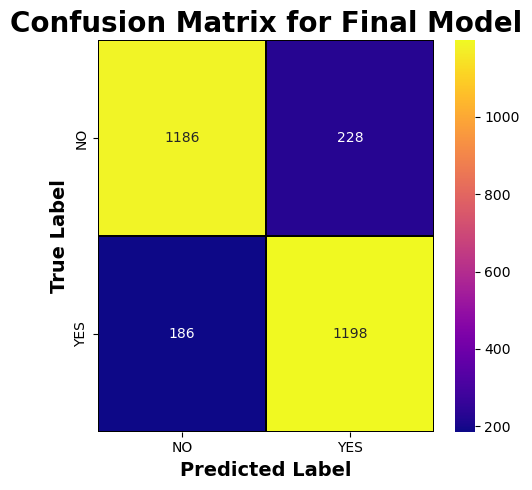

In [94]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

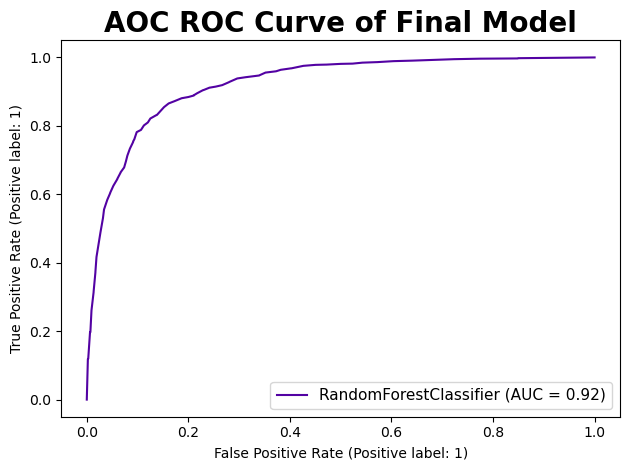

Auc Score :
 0.8521811202590119


In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving the model

In [96]:
import joblib
joblib.dump(Final_mod,'Customer_Churn_Final.pkl')

['Customer_Churn_Final.pkl']